In [24]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()
   
    labels_id =[]
    labels_class =[]
    for each in list_labels:
        labels_id.append(each[0])
        labels_class.append(each[1])
        
    series_labels = pd.DataFrame(labels_class, index=labels_id)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['label']
print df_labels.head()
print df_labels.tail()

                label
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
            label
60739  functional
27263  functional
37057  functional
31282  functional
26348  functional


In [25]:
def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    list_pumps_id = []
    list_pumps_fields = []
    for each in list_pumps:
        list_pumps_id.append(each[0])
        list_pumps_fields.append(each)

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps_fields, index=list_pumps_id)

    return df_pumps

df_data = load_wells()

print df_data.head()
print df_data.tail()

          0     1           2             3     4             5          6   \
69572  69572  6000  2011-03-14         Roman  1390         Roman  34.938093   
8776    8776     0  2013-03-06       Grumeti  1399       GRUMETI  34.698766   
34310  34310    25  2013-02-25  Lottery Club   686  World vision  37.460664   
67743  67743     0  2013-01-28        Unicef   263        UNICEF  38.486161   
19728  19728     0  2011-07-13   Action In A     0       Artisan  31.130847   

              7                     8  9          ...                  30  \
69572  -9.856322                  none  0         ...            annually   
8776   -2.147466              Zahanati  0         ...           never pay   
34310  -3.821329           Kwa Mahundi  0         ...          per bucket   
67743 -11.155298  Zahanati Ya Nanyumbu  0         ...           never pay   
19728  -1.825359               Shuleni  0         ...           never pay   

         31    32            33            34                 

In [26]:
df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [27]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [28]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()
print df_data.shape
print df_labels.shape

df_complete = pd.concat([df_data,df_labels],axis=1)

print df_complete.shape
print df_complete.columns.values



          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [29]:
df_complete.to_csv('/Users/martinrasumoff/map.csv', sep=',', index=False)

In [30]:
df_data_basin = pd.get_dummies(df_data['basin'])
print 'basin:',df_data_basin.shape
df_data_public_meeting = pd.get_dummies(df_data['public_meeting'])
print 'Public Meeting:',df_data_public_meeting.shape
df_data_scheme_mgmnt = pd.get_dummies(df_data['scheme_management'])
print 'Scheme Management:',df_data_scheme_mgmnt.shape
df_data_permit = pd.get_dummies(df_data['permit'])
print 'permit:',df_data_permit.shape
df_data_extraction_type_group = pd.get_dummies(df_data['extraction_type_group'])
print 'Data Extraction:',df_data_extraction_type_group.shape
df_data_extraction_type_class = pd.get_dummies(df_data['extraction_type_class'])
print 'Data Extr Type:',df_data_extraction_type_class.shape
df_data_management_group = pd.get_dummies(df_data['management_group'])
print 'Management Group:',df_data_management_group.shape
df_data_payment_type = pd.get_dummies(df_data['payment_type'])
print 'Payment Type:',df_data_payment_type.shape
df_data_quality_group = pd.get_dummies(df_data['quality_group'])
print 'Quality Group:',df_data_quality_group.shape
df_data_quantity_group = pd.get_dummies(df_data['quantity_group'])
print 'Quantity Group:',df_data_quantity_group.shape
df_data_source_type = pd.get_dummies(df_data['source_type'])
print 'Source Type:',df_data_source_type.shape
df_data_source_class = pd.get_dummies(df_data['source_class'])
print 'Source Class:',df_data_source_class.shape
df_data_waterpoint_type_group = pd.get_dummies(df_data['waterpoint_type_group'])
print 'Waterpoint Type:',df_data_waterpoint_type_group.shape

basin: (59400, 9)
Public Meeting: (59400, 2)
Scheme Management: (59400, 12)
permit: (59400, 2)
Data Extraction: (59400, 13)
Data Extr Type: (59400, 7)
Management Group: (59400, 5)
Payment Type: (59400, 7)
Quality Group: (59400, 6)
Quantity Group: (59400, 5)
Source Type: (59400, 7)
Source Class: (59400, 3)
Waterpoint Type: (59400, 6)


In [31]:
df_data = df_data[['amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

df_coded = pd.concat([df_data,df_data_basin,df_data_public_meeting,df_data_scheme_mgmnt,df_data_permit,\
                      df_data_extraction_type_group,df_data_extraction_type_class,df_data_management_group,\
                      df_data_payment_type,df_data_quality_group,df_data_quantity_group,\
                      df_data_source_type,df_data_source_class,df_data_waterpoint_type_group],axis=1)

print df_data.shape
print df_coded.shape


(59400, 7)
(59400, 91)


In [32]:
df_coded.sort_index(inplace=True)
df_labels.sort_index(inplace=True)

print (df_labels.index == df_coded.index).sum()
print df_coded.shape

print len(df_labels)
print len(df_coded)

59400
(59400, 91)
59400
59400


In [33]:
print df_coded.tail()
print df_labels.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
74240           0        1183  37.007726  -3.280868            2   
74242           0           0  33.724987  -8.940758           12   
74243           0        1188  33.963539  -1.429477           20   
74246          50        1428  35.630481  -7.710549           11   
74247          50         965  35.432998 -10.639270           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
74240              7         350         0           0           0  ...     
74242              2           0         0           0           0  ...     
74243              6          95         0           0           0  ...     
74246              1           1         0           0           0  ...     
74247              2         900         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
74240       0            0        1        0              0   
74

In [34]:
print (df_labels.index == df_coded.index).sum()
print df_coded.shape



59400
(59400, 91)


In [35]:
print df_coded.head()
print df_labels.head()

   amount_tsh  gps_height  longitude  latitude  region_code  district_code  \
0           0           0  33.125828 -5.118154           14              3   
1           0        1978  34.770717 -9.395642           11              4   
2           0           0  36.115056 -6.279268            1              4   
3          10        1639  37.147432 -3.187555            3              5   
4           0           0  36.164893 -6.099289            1              4   

   population  Internal  Lake Nyasa  Lake Rukwa  ...    spring  groundwater  \
0           0         0           0           0  ...         0            1   
1          20         0           0           0  ...         0            1   
2           0         0           0           0  ...         0            1   
3          25         0           0           0  ...         1            1   
4           0         0           0           0  ...         0            1   

   surface  unknown  cattle trough  communal standpipe  

In [36]:
%matplotlib inline

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

print df_coded.shape
X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded, df_labels, test_size=0.25, random_state=43)

X = X_pumps_train
y = y_pumps_train[['label']]

print X.shape
print y.shape

print X.head()
print y.head()



(59400, 91)
(44550, 91)
(44550, 1)
       amount_tsh  gps_height  longitude   latitude  region_code  \
37900           0           0  33.104711  -4.053327           14   
40527           0           0  32.569985  -8.954532           12   
26058           0        1804  31.736616  -8.439998           15   
6969          500        1821  34.774402  -9.123071           11   
41018         500         767  36.092962 -10.923966           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
37900              1           0         1           0           0  ...     
40527              6           0         0           0           1  ...     
26058              2         200         0           0           1  ...     
6969               4         108         0           0           0  ...     
41018              5         400         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
37900       0            1    

In [162]:
'''max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:
If int, then consider max_features features at each split.
If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features. Note: this parameter is tree-specific.
max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Ignored if max_leaf_nodes is not None. Note: this parameter is tree-specific.
min_samples_split : integer, optional (default=2)
The minimum number of samples required to split an internal node. Note: this parameter is tree-specific.
min_samples_leaf : integer, optional (default=1)
The minimum number of samples in newly created leaves. A split is discarded if after the split, one of the leaves would contain less then min_samples_leaf samples. Note: this parameter is tree-specific.
min_weight_fraction_leaf : float, optional (default=0.)
The minimum weighted fraction of the input samples required to be at a leaf node. Note: this parameter is tree-specific.
max_leaf_nodes : int or None, optional (default=None)
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. If not None then max_depth will be ignored. Note: this parameter is tree-specific.
'''

'max_features : int, float, string or None, optional (default=\xe2\x80\x9dauto\xe2\x80\x9d)\nThe number of features to consider when looking for the best split:\nIf int, then consider max_features features at each split.\nIf float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.\nIf \xe2\x80\x9cauto\xe2\x80\x9d, then max_features=sqrt(n_features).\nIf \xe2\x80\x9csqrt\xe2\x80\x9d, then max_features=sqrt(n_features).\nIf \xe2\x80\x9clog2\xe2\x80\x9d, then max_features=log2(n_features).\nIf None, then max_features=n_features.\nNote: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features. Note: this parameter is tree-specific.\nmax_depth : integer or None, optional (default=None)\nThe maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min

In [39]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

'''
n_estimators increase start with 20, default is 10

'''

l_labels = ['functional' 'non functional' 'functional needs repair']
num_estimators = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
max_leaf_nod = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
train_res = []
test_res = []
acc_score = []
prec_score = []
reca_score = []
fll_score = []
rec_fl_score = []

df_accuracy = pd.DataFrame(acc_score,index=num_estimators,columns=max_leaf_nod)
df_precision = pd.DataFrame(prec_score,index=num_estimators,columns=max_leaf_nod)
df_recall = pd.DataFrame(reca_score,index=num_estimators,columns=max_leaf_nod)
df_fl = pd.DataFrame(f1_score,index=num_estimators,columns=max_leaf_nod)

print df_accuracy.shape
print df_precision.shape
print df_recall.shape
print df_fl.shape

for estim in num_estimators:

    for max_leafs in max_leaf_nod:

        X = X_pumps_train
        y = y_pumps_train[['label']]

        clf = ExtraTreesClassifier(n_estimators=estim,max_depth=20,max_features='log2',min_samples_split=15,\
                                  max_leaf_nodes=max_leafs)
        
        X_new_t = clf.fit_transform(X, y)

        result_train = clf.score(X,y)
        result_test = clf.score(X_pumps_test,y_pumps_test)

        result_pred = clf.predict(X_pumps_test)

        acc_1 = accuracy_score(y_pumps_test, result_pred)
        clf_precision, clf_recall, clf_f1, _ = precision_recall_fscore_support(y_pumps_test,result_pred, \
                                                                               pos_label=None,\
                                                                               average=None)

        print "+++++++++++++++++++"
        print "Number of Estimators: ", estim
        print "Min Leaves: ", max_leafs
        print "Classes: ",clf.classes_
        print "+++++++++++++++++++"
        print "Accuracy Score: ",acc_1
        print "Precision Score:",clf_precision
        print "Recall Score:",clf_recall
        print "Fl Score:",clf_f1
        print "------------------"

        df_accuracy.ix[estim,max_leafs] = acc_1
        df_precision.ix[estim,max_leafs] = clf_precision
        df_recall.ix[estim,max_leafs] = clf_recall
        df_fl.ix[estim,max_leafs] = clf_f1


(29, 19)
(29, 19)
(29, 19)
(29, 19)
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.611851851852
Precision Score: [ 0.58894321  0.          0.80771704]
Recall Score: [ 0.96929933  0.          0.22132159]
Fl Score: [ 0.73270014  0.          0.34744122]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.618181818182
Precision Score: [ 0.59319594  0.          0.81779661]
Recall Score: [ 0.96917554  0.          0.23806167]
Fl Score: [ 0.73594661  0.          0.36877303]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.648080808081
Precision Score: [ 0.61009174  0.          0.92881356]
Recall Score: [ 0.98786828  0.          0.28969163]
Fl Score: [ 0.75432461  0.          0.44163868]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.613131313131
Precision Score: [ 0.58488237  0.          0.97402597]
Recall Score: [ 0.99715276  0.          0.18502203]
Fl Score: [ 0.73729977  0.          0.3109729 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.654074074074
Precision Score: [ 0.61890389  0.          0.85      ]
Recall Score: [ 0.9645952  0.         0.3385022]
Fl Score: [ 0.75401587  0.          0.48418399]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.637575757576
Precision Score: [ 0.61477078  0.          0.74659401]
Recall Score: [ 0.93463729  0.          0.33797357]
Fl Score: [ 0.74168672  0.          0.4653081 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.649023569024
Precision Score: [ 0.62013934  0.          0.79130088]
Recall Score: [ 0.94763555  0.          0.34942731]
Fl Score: [ 0.74968172  0.          0.48478181]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.650774410774
Precision Score: [ 0.62675642  0.          0.7470489 ]
Recall Score: [ 0.92213419  0.          0.39030837]
Fl Score: [ 0.74628062  0.          0.51273148]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.65797979798
Precision Score: [ 0.61930654  0.          0.88518519]
Recall Score: [ 0.97288933  0.          0.3369163 ]
Fl Score: [ 0.75683744  0.          0.48806637]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.627878787879
Precision Score: [ 0.60625553  0.          0.73932864]
Recall Score: [ 0.93339936  0.          0.31436123]
Fl Score: [ 0.7350719   0.          0.44114738]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.645117845118
Precision Score: [ 0.62808854  0.          0.70726362]
Recall Score: [ 0.90628869  0.          0.39806167]
Fl Score: [ 0.74196818  0.          0.50941482]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695824915825
Precision Score: [ 0.64979707  0.73333333  0.8968139 ]
Recall Score: [ 0.97115623  0.01002735  0.43647577]
Fl Score: [ 0.77862141  0.01978417  0.58717554]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.662424242424
Precision Score: [ 0.63151767  0.          0.7939823 ]
Recall Score: [ 0.94008418  0.          0.39524229]
Fl Score: [ 0.75550913  0.          0.52776471]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.665185185185
Precision Score: [ 0.64925239  0.          0.71237994]
Recall Score: [ 0.89230007  0.          0.47048458]
Fl Score: [ 0.75161627  0.          0.5666985 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.661885521886
Precision Score: [ 0.63151796  0.          0.79443642]
Recall Score: [ 0.94454073  0.          0.38748899]
Fl Score: [ 0.75694444  0.          0.52090489]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.677373737374
Precision Score: [ 0.63890039  0.          0.84493329]
Recall Score: [ 0.95518693  0.          0.41286344]
Fl Score: [ 0.76566609  0.          0.5546875 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69063973064
Precision Score: [ 0.65241922  0.          0.83248731]
Recall Score: [ 0.94478831  0.          0.46237885]
Fl Score: [ 0.77184466  0.          0.59453948]
------------------
+++++++++++++++++++
Number of Estimators:  2
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.679191919192
Precision Score: [ 0.66929816  0.          0.70221824]
Recall Score: [ 0.86060906  0.          0.5522467 ]
Fl Score: [ 0.75299215  0.          0.6182679 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  2
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.667070707071
Precision Score: [ 0.63148874  0.          0.83487298]
Recall Score: [ 0.95778658  0.          0.38220264]
Fl Score: [ 0.76114117  0.          0.52435634]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.611851851852
Precision Score: [ 0.58894321  0.          0.80771704]
Recall Score: [ 0.96929933  0.          0.22132159]
Fl Score: [ 0.73270014  0.          0.34744122]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.623838383838
Precision Score: [ 0.59828928  0.          0.80085424]
Recall Score: [ 0.96112899  0.          0.26431718]
Fl Score: [ 0.73749703  0.          0.39745628]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.631582491582
Precision Score: [ 0.6042735   0.          0.80909091]
Recall Score: [ 0.9627383   0.          0.28229075]
Fl Score: [ 0.74250525  0.          0.41854997]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.638720538721
Precision Score: [ 0.61019633  0.          0.80117223]
Recall Score: [ 0.95419658  0.          0.31312775]
Fl Score: [ 0.7443747   0.          0.45027239]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.672861952862
Precision Score: [ 0.63340935  0.          0.86119751]
Recall Score: [ 0.9627383   0.          0.39030837]
Fl Score: [ 0.76409904  0.          0.53716503]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.645723905724
Precision Score: [ 0.61471242  0.          0.81830239]
Recall Score: [ 0.95791037  0.          0.3261674 ]
Fl Score: [ 0.74886287  0.          0.46642308]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68632996633
Precision Score: [ 0.64111754  0.          0.90205985]
Recall Score: [ 0.97437485  0.          0.40898678]
Fl Score: [ 0.77337264  0.          0.5628031 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699124579125
Precision Score: [ 0.65979648  0.          0.83927474]
Recall Score: [ 0.94714038  0.          0.48123348]
Fl Score: [ 0.77777778  0.          0.61171464]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.676767676768
Precision Score: [ 0.64958242  0.          0.7657554 ]
Recall Score: [ 0.91470661  0.          0.46889868]
Fl Score: [ 0.75967717  0.          0.58163934]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.65037037037
Precision Score: [ 0.62688707  0.          0.74340127]
Recall Score: [ 0.9201535   0.          0.39207048]
Fl Score: [ 0.7457236   0.          0.51338256]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.665589225589
Precision Score: [ 0.64197852  0.          0.74803388]
Recall Score: [ 0.91743006  0.          0.43577093]
Fl Score: [ 0.75537662  0.          0.55071818]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695488215488
Precision Score: [ 0.65711835  0.          0.83573668]
Recall Score: [ 0.9485021   0.          0.46977974]
Fl Score: [ 0.77637045  0.          0.60146644]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684983164983
Precision Score: [ 0.65193947  0.          0.79832936]
Recall Score: [ 0.92795246  0.          0.47154185]
Fl Score: [ 0.76583572  0.          0.592888  ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.679259259259
Precision Score: [ 0.63906494  0.          0.86005183]
Recall Score: [ 0.96112899  0.          0.40933921]
Fl Score: [ 0.76768676  0.          0.55468004]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705656565657
Precision Score: [ 0.66428264  0.          0.85362096]
Recall Score: [ 0.95432038  0.          0.48810573]
Fl Score: [ 0.78331555  0.          0.62107623]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698855218855
Precision Score: [ 0.65657761  0.          0.86432826]
Recall Score: [ 0.96137658  0.          0.46026432]
Fl Score: [ 0.78026726  0.          0.6006669 ]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.664781144781
Precision Score: [ 0.63378151  0.          0.78983051]
Recall Score: [ 0.93364694  0.          0.41057269]
Fl Score: [ 0.75503053  0.          0.54028986]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  3
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701144781145
Precision Score: [ 0.65912984  0.          0.85570258]
Recall Score: [ 0.95271107  0.          0.47859031]
Fl Score: [ 0.77918396  0.          0.61385467]
------------------
+++++++++++++++++++
Number of Estimators:  3
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695353535354
Precision Score: [ 0.65815001  0.          0.8253632 ]
Recall Score: [ 0.94070314  0.          0.48052863]
Fl Score: [ 0.77445985  0.          0.60741731]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.669292929293
Precision Score: [ 0.62564706  0.          0.93428571]
Recall Score: [ 0.98749691  0.          0.34572687]
Fl Score: [ 0.76598809  0.          0.50469453]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68303030303
Precision Score: [ 0.64349063  0.          0.84610076]
Recall Score: [ 0.9520921   0.          0.43207048]
Fl Score: [ 0.76794808  0.          0.57202846]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.626531986532
Precision Score: [ 0.60234375  0.          0.77756098]
Recall Score: [ 0.95444417  0.          0.28088106]
Fl Score: [ 0.73857649  0.          0.41268608]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.661077441077
Precision Score: [ 0.62772535  0.          0.8213448 ]
Recall Score: [ 0.95518693  0.          0.37022026]
Fl Score: [ 0.75758468  0.          0.51038504]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.621346801347
Precision Score: [ 0.63171552  0.          0.59707537]
Recall Score: [ 0.81369151  0.          0.4676652 ]
Fl Score: [ 0.71124817  0.          0.52450593]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.637912457912
Precision Score: [ 0.60639121  0.          0.84942887]
Recall Score: [ 0.97016588  0.          0.28828194]
Fl Score: [ 0.74630988  0.          0.43046968]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.681750841751
Precision Score: [ 0.63754255  0.          0.89888535]
Recall Score: [ 0.97375588  0.          0.39788546]
Fl Score: [ 0.7705721  0.         0.5516062]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.683569023569
Precision Score: [ 0.64546833  0.          0.83546004]
Recall Score: [ 0.9486259  0.         0.4384141]
Fl Score: [ 0.76822055  0.          0.57506067]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.687474747475
Precision Score: [ 0.64826831  0.          0.8434462 ]
Recall Score: [ 0.95233969  0.          0.44334802]
Fl Score: [ 0.77142141  0.          0.58119658]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697441077441
Precision Score: [ 0.65481933  0.          0.86350148]
Recall Score: [ 0.95791037  0.          0.4614978 ]
Fl Score: [ 0.77788389  0.          0.60151585]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695151515152
Precision Score: [ 0.65190776  0.          0.87145299]
Recall Score: [ 0.96236692  0.          0.449163  ]
Fl Score: [ 0.77728341  0.          0.5927907 ]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693131313131
Precision Score: [ 0.65455792  0.          0.83480176]
Recall Score: [ 0.94577866  0.          0.46748899]
Fl Score: [ 0.77367089  0.          0.59934485]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.682222222222
Precision Score: [ 0.6445697   0.          0.83327708]
Recall Score: [ 0.9485021   0.          0.43506608]
Fl Score: [ 0.7675432   0.          0.57166011]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.679326599327
Precision Score: [ 0.64188177  0.          0.83767606]
Recall Score: [ 0.95432038  0.          0.41920705]
Fl Score: [ 0.7675229   0.          0.55877863]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696430976431
Precision Score: [ 0.65532532  0.          0.8507845 ]
Recall Score: [ 0.95134934  0.          0.46819383]
Fl Score: [ 0.77606665  0.          0.60400091]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695824915825
Precision Score: [ 0.65993735  0.          0.81864205]
Recall Score: [ 0.93884625  0.          0.48440529]
Fl Score: [ 0.77506387  0.          0.60865715]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.658653198653
Precision Score: [ 0.62675651  0.          0.80343156]
Recall Score: [ 0.94416935  0.          0.37955947]
Fl Score: [ 0.75339556  0.          0.51555768]
------------------
+++++++++++++++++++
Number of Estimators:  4
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704579124579
Precision Score: [ 0.6639778   0.          0.84552846]
Recall Score: [ 0.94763555  0.          0.49480176]
Fl Score: [ 0.78084358  0.          0.62427746]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  4
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.691178451178
Precision Score: [ 0.65554882  0.          0.81554279]
Recall Score: [ 0.93674177  0.          0.47524229]
Fl Score: [ 0.77131645  0.          0.6005344 ]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.55063973064
Precision Score: [ 0.54774995  0.          0.91452991]
Recall Score: [ 0.99900966  0.          0.01885463]
Fl Score: [ 0.70755337  0.          0.03694751]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.680336700337
Precision Score: [ 0.63964779  0.          0.86360267]
Recall Score: [ 0.96224313  0.          0.41057269]
Fl Score: [ 0.76846268  0.          0.55655082]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.678720538721
Precision Score: [ 0.63774883  0.          0.86795308]
Recall Score: [ 0.96372865  0.          0.40422907]
Fl Score: [ 0.76756224  0.          0.5515749 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694747474747
Precision Score: [ 0.64817265  0.          0.89912917]
Recall Score: [ 0.97041347  0.          0.43665198]
Fl Score: [ 0.77721594  0.          0.58783063]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.67797979798
Precision Score: [ 0.64013956  0.          0.83997155]
Recall Score: [ 0.953949    0.          0.41621145]
Fl Score: [ 0.76615629  0.          0.556616  ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69696969697
Precision Score: [ 0.65527186  0.          0.85756289]
Recall Score: [ 0.95630106  0.          0.46255507]
Fl Score: [ 0.77767152  0.          0.60096154]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.683164983165
Precision Score: [ 0.6518718   0.          0.79112976]
Recall Score: [ 0.9290666   0.          0.46519824]
Fl Score: [ 0.76616814  0.          0.58588549]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68101010101
Precision Score: [ 0.64080317  0.          0.8580786 ]
Recall Score: [ 0.96001486  0.          0.41550661]
Fl Score: [ 0.76858276  0.          0.55989552]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.66734006734
Precision Score: [ 0.62980964  0.          0.85229541]
Recall Score: [ 0.96249072  0.          0.37621145]
Fl Score: [ 0.76139646  0.          0.52200489]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.687878787879
Precision Score: [ 0.64824673  0.          0.84344942]
Recall Score: [ 0.94974003  0.          0.44810573]
Fl Score: [ 0.7705519   0.          0.58527043]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697239057239
Precision Score: [ 0.65460693  0.          0.86423841]
Recall Score: [ 0.95865313  0.          0.45991189]
Fl Score: [ 0.7779787   0.          0.60034503]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692996632997
Precision Score: [ 0.65110214  0.          0.86099865]
Recall Score: [ 0.95803417  0.          0.44969163]
Fl Score: [ 0.77529553  0.          0.59080912]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.689427609428
Precision Score: [ 0.64785081  0.          0.86134163]
Recall Score: [ 0.95902451  0.          0.43894273]
Fl Score: [ 0.77330805  0.          0.58153379]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700134680135
Precision Score: [ 0.66015827  0.          0.8442928 ]
Recall Score: [ 0.95011141  0.          0.47964758]
Fl Score: [ 0.77902964  0.          0.61175413]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706060606061
Precision Score: [ 0.66350874  0.          0.85859833]
Recall Score: [ 0.95370141  0.          0.49004405]
Fl Score: [ 0.78256895  0.          0.62396231]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695353535354
Precision Score: [ 0.65306984  0.          0.86174809]
Recall Score: [ 0.95729141  0.          0.4569163 ]
Fl Score: [ 0.7764446   0.          0.59719023]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.683703703704
Precision Score: [ 0.64470824  0.          0.84522161]
Recall Score: [ 0.95469176  0.          0.43013216]
Fl Score: [ 0.76966068  0.          0.57012729]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  5
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708821548822
Precision Score: [ 0.67076406  0.          0.83032185]
Recall Score: [ 0.93897004  0.          0.51823789]
Fl Score: [ 0.78252347  0.          0.6381686 ]
------------------
+++++++++++++++++++
Number of Estimators:  5
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684915824916
Precision Score: [ 0.65297598  0.          0.79422275]
Recall Score: [ 0.92894281  0.          0.46995595]
Fl Score: [ 0.76688809  0.          0.59050149]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.63265993266
Precision Score: [ 0.59749314  0.          0.97951719]
Recall Score: [ 0.99727655  0.          0.23594714]
Fl Score: [ 0.74727517  0.          0.38028969]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.617508417508
Precision Score: [ 0.59318683  0.          0.8057681 ]
Recall Score: [ 0.96570933  0.          0.24123348]
Fl Score: [ 0.73493806  0.          0.37130458]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.689696969697
Precision Score: [ 0.6476788   0.          0.86321244]
Recall Score: [ 0.95852934  0.          0.44035242]
Fl Score: [ 0.77302451  0.          0.5831972 ]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692592592593
Precision Score: [ 0.650557    0.          0.86499485]
Recall Score: [ 0.96150037  0.          0.44370044]
Fl Score: [ 0.77604037  0.          0.58653622]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.6767003367
Precision Score: [ 0.63781734  0.          0.85025754]
Recall Score: [ 0.95791037  0.          0.40722467]
Fl Score: [ 0.76575952  0.          0.55069701]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.686464646465
Precision Score: [ 0.64343451  0.          0.87784299]
Recall Score: [ 0.96570933  0.          0.42167401]
Fl Score: [ 0.77229977  0.          0.56969408]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.657239057239
Precision Score: [ 0.62359007  0.          0.82854799]
Recall Score: [ 0.95815796  0.          0.35594714]
Fl Score: [ 0.75549048  0.          0.49796623]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696026936027
Precision Score: [ 0.65378775  0.          0.86315087]
Recall Score: [ 0.95939589  0.          0.45568282]
Fl Score: [ 0.77764399  0.          0.596471  ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.672053872054
Precision Score: [ 0.63387308  0.          0.85011442]
Recall Score: [ 0.95951968  0.          0.39277533]
Fl Score: [ 0.76341968  0.          0.53730264]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699124579125
Precision Score: [ 0.65339011  0.          0.88970077]
Recall Score: [ 0.96868037  0.          0.45057269]
Fl Score: [ 0.78039294  0.          0.59819862]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696094276094
Precision Score: [ 0.65604227  0.          0.84691913]
Recall Score: [ 0.95295865  0.          0.46502203]
Fl Score: [ 0.77710478  0.          0.60038676]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.672727272727
Precision Score: [ 0.63823727  0.          0.81400137]
Recall Score: [ 0.94305521  0.          0.41797357]
Fl Score: [ 0.76126711  0.          0.55233438]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.688417508418
Precision Score: [ 0.64626582  0.          0.87314244]
Recall Score: [ 0.96731864  0.          0.42449339]
Fl Score: [ 0.7748525   0.          0.57125919]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.662356902357
Precision Score: [ 0.62868128  0.          0.81911653]
Recall Score: [ 0.95134934  0.          0.37903084]
Fl Score: [ 0.75706827  0.          0.51825081]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698114478114
Precision Score: [ 0.65701844  0.          0.85149777]
Recall Score: [ 0.95258727  0.          0.470837  ]
Fl Score: [ 0.77766549  0.          0.60637694]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684713804714
Precision Score: [ 0.65287316  0.          0.79414401]
Recall Score: [ 0.92968557  0.          0.46837004]
Fl Score: [ 0.76707012  0.          0.58922634]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701212121212
Precision Score: [ 0.66050391  0.          0.84818379]
Recall Score: [ 0.95085417  0.          0.48140969]
Fl Score: [ 0.77951997  0.          0.61420863]
------------------
+++++++++++++++++++
Number of Estimators:  6
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707205387205
Precision Score: [ 0.66424682  0.          0.85879841]
Recall Score: [ 0.95147314  0.          0.49621145]
Fl Score: [ 0.78232989  0.          0.62899263]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  6
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693063973064
Precision Score: [ 0.65621501  0.          0.825054  ]
Recall Score: [ 0.94305521  0.          0.47118943]
Fl Score: [ 0.77391172  0.          0.59982055]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.59367003367
Precision Score: [ 0.57360006  0.          0.90365449]
Recall Score: [ 0.99034414  0.          0.14378855]
Fl Score: [ 0.72644722  0.          0.24809973]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.631717171717
Precision Score: [ 0.59930733  0.          0.90625   ]
Recall Score: [ 0.98539242  0.          0.25039648]
Fl Score: [ 0.74531835  0.          0.39237885]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.640673400673
Precision Score: [ 0.60545358  0.          0.90935503]
Recall Score: [ 0.9840307   0.          0.27577093]
Fl Score: [ 0.74965813  0.          0.42320173]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.689225589226
Precision Score: [ 0.64287458  0.          0.91143192]
Recall Score: [ 0.97784105  0.          0.41162996]
Fl Score: [ 0.7757427   0.          0.56712794]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.657643097643
Precision Score: [ 0.62121452  0.          0.86314848]
Recall Score: [ 0.97004209  0.          0.34008811]
Fl Score: [ 0.75739416  0.          0.4879282 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.669292929293
Precision Score: [ 0.62995488  0.          0.86956522]
Recall Score: [ 0.96793761  0.          0.37356828]
Fl Score: [ 0.76320156  0.          0.52261802]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.657508417508
Precision Score: [ 0.62517244  0.          0.81519588]
Recall Score: [ 0.95370141  0.          0.36299559]
Fl Score: [ 0.7552571   0.          0.50231651]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.683771043771
Precision Score: [ 0.64134639  0.          0.87476843]
Recall Score: [ 0.96471899  0.          0.41603524]
Fl Score: [ 0.77047803  0.          0.56388823]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693939393939
Precision Score: [ 0.65220687  0.          0.86030893]
Recall Score: [ 0.95852934  0.          0.45145374]
Fl Score: [ 0.7762406   0.          0.59216457]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.668417508418
Precision Score: [ 0.63470622  0.          0.81458857]
Recall Score: [ 0.94813073  0.          0.39947137]
Fl Score: [ 0.76038719  0.          0.53606053]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.673198653199
Precision Score: [ 0.63655878  0.          0.83528123]
Recall Score: [ 0.95444417  0.          0.40299559]
Fl Score: [ 0.76374443  0.          0.5436824 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696632996633
Precision Score: [ 0.65702018  0.          0.84056162]
Recall Score: [ 0.94714038  0.          0.47471366]
Fl Score: [ 0.77584546  0.          0.60675676]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700875420875
Precision Score: [ 0.65860719  0.          0.86082474]
Recall Score: [ 0.95766279  0.          0.470837  ]
Fl Score: [ 0.78046812  0.          0.60872537]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692053872054
Precision Score: [ 0.65344592  0.          0.83685221]
Recall Score: [ 0.94837831  0.          0.46096916]
Fl Score: [ 0.77376023  0.          0.5944779 ]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690033670034
Precision Score: [ 0.64686825  0.          0.87482219]
Recall Score: [ 0.96397623  0.          0.43348018]
Fl Score: [ 0.77420958  0.          0.57971014]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696632996633
Precision Score: [ 0.65655703  0.          0.84578696]
Recall Score: [ 0.95134934  0.          0.46872247]
Fl Score: [ 0.77692969  0.          0.6031746 ]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708552188552
Precision Score: [ 0.66786371  0.          0.84386834]
Recall Score: [ 0.94392176  0.          0.51048458]
Fl Score: [ 0.78225186  0.          0.63614405]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  7
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710235690236
Precision Score: [ 0.6662932   0.          0.86726209]
Recall Score: [ 0.95704382  0.          0.49621145]
Fl Score: [ 0.78563081  0.          0.6312486 ]
------------------
+++++++++++++++++++
Number of Estimators:  7
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707609427609
Precision Score: [ 0.66411294  0.          0.8639035 ]
Recall Score: [ 0.95506313  0.          0.49215859]
Fl Score: [ 0.78344758  0.          0.62707678]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.57164983165
Precision Score: [ 0.56016742  0.          0.89126214]
Recall Score: [ 0.99405794  0.          0.08088106]
Fl Score: [ 0.71654843  0.          0.14830372]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.624848484848
Precision Score: [ 0.59909391  0.          0.80842912]
Recall Score: [ 0.96583313  0.          0.26026432]
Fl Score: [ 0.73949102  0.          0.39376166]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.674410774411
Precision Score: [ 0.63420582  0.          0.86852433]
Recall Score: [ 0.96583313  0.          0.38995595]
Fl Score: [ 0.7656526   0.          0.53824638]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.678585858586
Precision Score: [ 0.63683739  0.          0.87816271]
Recall Score: [ 0.96818519  0.          0.39753304]
Fl Score: [ 0.76830886  0.          0.54730713]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.671515151515
Precision Score: [ 0.63269968  0.          0.85499422]
Recall Score: [ 0.96001486  0.          0.39066079]
Fl Score: [ 0.76272437  0.          0.53628447]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694141414141
Precision Score: [ 0.65123898  0.          0.86757216]
Recall Score: [ 0.95976727  0.          0.45022026]
Fl Score: [ 0.77595957  0.          0.59280742]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703232323232
Precision Score: [ 0.65792138  0.          0.88251001]
Recall Score: [ 0.96546175  0.          0.46590308]
Fl Score: [ 0.78256071  0.          0.60984892]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.683636363636
Precision Score: [ 0.64157618  0.          0.87342242]
Recall Score: [ 0.96546175  0.          0.41462555]
Fl Score: [ 0.7708807  0.         0.5623133]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693468013468
Precision Score: [ 0.65056913  0.          0.87008959]
Recall Score: [ 0.96224313  0.          0.44493392]
Fl Score: [ 0.77629082  0.          0.58878396]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694747474747
Precision Score: [ 0.65253666  0.          0.86260054]
Recall Score: [ 0.95852934  0.          0.45356828]
Fl Score: [ 0.77647413  0.          0.59452593]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.7
Precision Score: [ 0.65530016  0.          0.87857383]
Recall Score: [ 0.96348106  0.          0.46026432]
Fl Score: [ 0.78005512  0.          0.60407031]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700404040404
Precision Score: [ 0.65825375  0.          0.85874439]
Recall Score: [ 0.9556821   0.          0.47242291]
Fl Score: [ 0.77956175  0.          0.60952597]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.685656565657
Precision Score: [ 0.64622445  0.          0.85061082]
Recall Score: [ 0.95877692  0.          0.42942731]
Fl Score: [ 0.77206799  0.          0.570726  ]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696430976431
Precision Score: [ 0.65626603  0.          0.84549492]
Recall Score: [ 0.950359    0.          0.46960352]
Fl Score: [ 0.77639563  0.          0.60382916]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706262626263
Precision Score: [ 0.66108182  0.          0.87807245]
Recall Score: [ 0.96224313  0.          0.4784141 ]
Fl Score: [ 0.78372656  0.          0.61936808]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704848484848
Precision Score: [ 0.65900805  0.          0.88183306]
Recall Score: [ 0.96224313  0.          0.47471366]
Fl Score: [ 0.7822674   0.          0.61718213]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711851851852
Precision Score: [ 0.67028351  0.          0.85067212]
Recall Score: [ 0.94825452  0.          0.51295154]
Fl Score: [ 0.78539936  0.          0.63999121]
------------------
+++++++++++++++++++
Number of Estimators:  8
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695218855219
Precision Score: [ 0.65514011  0.          0.84657446]
Recall Score: [ 0.9522159   0.          0.46378855]
Fl Score: [ 0.77622483  0.          0.5992714 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  8
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712794612795
Precision Score: [ 0.66991728  0.          0.85913819]
Recall Score: [ 0.95246348  0.          0.50942731]
Fl Score: [ 0.78658692  0.          0.63960177]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.642154882155
Precision Score: [ 0.60397749  0.          0.9757377 ]
Recall Score: [ 0.99628621  0.          0.26220264]
Fl Score: [ 0.75204411  0.          0.41333333]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684444444444
Precision Score: [ 0.64191636  0.          0.87564767]
Recall Score: [ 0.96533795  0.          0.4169163 ]
Fl Score: [ 0.77108672  0.          0.56488003]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.632996632997
Precision Score: [ 0.60308761  0.          0.83746702]
Recall Score: [ 0.96719485  0.          0.27964758]
Fl Score: [ 0.74292778  0.          0.41928666]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.646599326599
Precision Score: [ 0.61302952  0.          0.85281385]
Recall Score: [ 0.96917554  0.          0.31242291]
Fl Score: [ 0.75101923  0.          0.45731235]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696026936027
Precision Score: [ 0.65270214  0.          0.87341338]
Recall Score: [ 0.96434761  0.          0.44863436]
Fl Score: [ 0.77849398  0.          0.59278231]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.675286195286
Precision Score: [ 0.6359534  0.         0.8553719]
Recall Score: [ 0.95951968  0.          0.40123348]
Fl Score: [ 0.76492648  0.          0.54623965]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684242424242
Precision Score: [ 0.64354464  0.          0.85954253]
Recall Score: [ 0.96013865  0.          0.42378855]
Fl Score: [ 0.77059116  0.          0.56768559]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.654276094276
Precision Score: [ 0.62189616  0.          0.81847915]
Recall Score: [ 0.95493934  0.          0.35277533]
Fl Score: [ 0.75324675  0.          0.49304273]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.658181818182
Precision Score: [ 0.62491915  0.          0.82393231]
Recall Score: [ 0.95679624  0.          0.36035242]
Fl Score: [ 0.7560403   0.          0.50140983]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693333333333
Precision Score: [ 0.65005444  0.          0.87083476]
Recall Score: [ 0.96075761  0.          0.44669604]
Fl Score: [ 0.77544088  0.          0.59049616]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.668821548822
Precision Score: [ 0.63373673  0.          0.82648909]
Recall Score: [ 0.95295865  0.          0.39365639]
Fl Score: [ 0.76123609  0.          0.5333015 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690707070707
Precision Score: [ 0.65134425  0.          0.84243217]
Recall Score: [ 0.95073038  0.          0.45409692]
Fl Score: [ 0.77306357  0.          0.59010763]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702693602694
Precision Score: [ 0.66273524  0.          0.84151853]
Recall Score: [ 0.94602624  0.          0.49215859]
Fl Score: [ 0.77943801  0.          0.62108072]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.71138047138
Precision Score: [ 0.66895891  0.          0.85633551]
Recall Score: [ 0.95134934  0.          0.50731278]
Fl Score: [ 0.78554636  0.          0.63715835]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704175084175
Precision Score: [ 0.66390945  0.          0.84160475]
Recall Score: [ 0.94392176  0.          0.49903084]
Fl Score: [ 0.77953279  0.          0.62654867]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699057239057
Precision Score: [ 0.65593034  0.          0.86792453]
Recall Score: [ 0.96051003  0.          0.46202643]
Fl Score: [ 0.77952479  0.          0.60303588]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704377104377
Precision Score: [ 0.66299199  0.          0.85273232]
Recall Score: [ 0.95295865  0.          0.48669604]
Fl Score: [ 0.78195947  0.          0.61969935]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  9
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705791245791
Precision Score: [ 0.66628682  0.          0.83672284]
Recall Score: [ 0.94095073  0.          0.50748899]
Fl Score: [ 0.78014985  0.          0.63178677]
------------------
+++++++++++++++++++
Number of Estimators:  9
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711043771044
Precision Score: [ 0.66861022  0.          0.8562072 ]
Recall Score: [ 0.95110176  0.          0.50678414]
Fl Score: [ 0.78522152  0.          0.63670578]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.642154882155
Precision Score: [ 0.60397749  0.          0.9757377 ]
Recall Score: [ 0.99628621  0.          0.26220264]
Fl Score: [ 0.75204411  0.          0.41333333]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.62861952862
Precision Score: [ 0.59983202  0.          0.84369652]
Recall Score: [ 0.97251795  0.          0.26061674]
Fl Score: [ 0.74200708  0.          0.39822294]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.687407407407
Precision Score: [ 0.64233815  0.          0.89965398]
Recall Score: [ 0.97400347  0.          0.4123348 ]
Fl Score: [ 0.77414277  0.          0.56549058]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.670707070707
Precision Score: [ 0.63191627  0.          0.86014263]
Recall Score: [ 0.96422382  0.          0.38255507]
Fl Score: [ 0.76347775  0.          0.52957678]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.677171717172
Precision Score: [ 0.63624511  0.          0.87199379]
Recall Score: [ 0.96657589  0.          0.39612335]
Fl Score: [ 0.76737101  0.          0.5447716 ]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684646464646
Precision Score: [ 0.64102774  0.          0.88740966]
Recall Score: [ 0.9697945   0.          0.41110132]
Fl Score: [ 0.77186068  0.          0.56189788]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693804713805
Precision Score: [ 0.64906162  0.          0.88568376]
Recall Score: [ 0.96756623  0.          0.43823789]
Fl Score: [ 0.77693837  0.          0.58634917]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69063973064
Precision Score: [ 0.6471615   0.          0.87619723]
Recall Score: [ 0.96385244  0.          0.43524229]
Fl Score: [ 0.77437963  0.          0.581587  ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697104377104
Precision Score: [ 0.65305093  0.          0.87466125]
Recall Score: [ 0.96187175  0.          0.45497797]
Fl Score: [ 0.77793352  0.          0.59858584]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707542087542
Precision Score: [ 0.66192988  0.          0.88056811]
Recall Score: [ 0.96298589  0.          0.48070485]
Fl Score: [ 0.78456884  0.          0.62190813]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697777777778
Precision Score: [ 0.65522223  0.          0.8602011 ]
Recall Score: [ 0.95444417  0.          0.46731278]
Fl Score: [ 0.77702192  0.          0.60561772]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70835016835
Precision Score: [ 0.66319207  0.          0.87635092]
Recall Score: [ 0.96088141  0.          0.48581498]
Fl Score: [ 0.78475382  0.          0.6250992 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697104377104
Precision Score: [ 0.65383968  0.          0.86987223]
Recall Score: [ 0.96125279  0.          0.45585903]
Fl Score: [ 0.77829007  0.          0.59821945]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707878787879
Precision Score: [ 0.66423608  0.          0.86720952]
Recall Score: [ 0.95852934  0.          0.48792952]
Fl Score: [ 0.78469724  0.          0.62449256]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68
Precision Score: [ 0.64165556  0.          0.84201267]
Recall Score: [ 0.9538252   0.          0.42167401]
Fl Score: [ 0.76720104  0.          0.56193495]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701952861953
Precision Score: [ 0.65666246  0.          0.88426396]
Recall Score: [ 0.96694726  0.          0.46044053]
Fl Score: [ 0.78215591  0.          0.60556199]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700942760943
Precision Score: [ 0.66135596  0.          0.83944259]
Recall Score: [ 0.94553107  0.          0.48828194]
Fl Score: [ 0.77831559  0.          0.61742424]
------------------
+++++++++++++++++++
Number of Estimators:  10
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.715286195286
Precision Score: [ 0.6709487   0.          0.86872935]
Recall Score: [ 0.95692003  0.          0.50960352]
Fl Score: [ 0.78881576  0.          0.64238116]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  10
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702154882155
Precision Score: [ 0.65901919  0.          0.864     ]
Recall Score: [ 0.95654865  0.          0.47577093]
Fl Score: [ 0.78038681  0.          0.61363636]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.582154882155
Precision Score: [ 0.56597271  0.          0.94620253]
Recall Score: [ 0.99616242  0.          0.10537445]
Fl Score: [ 0.72183351  0.          0.18963057]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.635353535354
Precision Score: [ 0.60412022  0.          0.85605649]
Recall Score: [ 0.97288933  0.          0.27770925]
Fl Score: [ 0.74538815  0.          0.41937201]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.674612794613
Precision Score: [ 0.63398003  0.          0.87238246]
Recall Score: [ 0.96682347  0.          0.38907489]
Fl Score: [ 0.76579889  0.          0.53814282]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.626936026936
Precision Score: [ 0.5995857   0.          0.82323789]
Recall Score: [ 0.96744244  0.          0.26343612]
Fl Score: [ 0.74033725  0.          0.39914564]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.648215488215
Precision Score: [ 0.61640569  0.          0.82459233]
Recall Score: [ 0.96001486  0.          0.32969163]
Fl Score: [ 0.75076238  0.          0.47104733]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.688417508418
Precision Score: [ 0.6441849   0.          0.88818722]
Recall Score: [ 0.96954692  0.          0.42132159]
Fl Score: [ 0.77406602  0.          0.57153101]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692794612795
Precision Score: [ 0.64883972  0.          0.87973116]
Recall Score: [ 0.96570933  0.          0.43823789]
Fl Score: [ 0.77618029  0.          0.58503881]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.640606060606
Precision Score: [ 0.6109708   0.          0.81284404]
Recall Score: [ 0.95828175  0.          0.3122467 ]
Fl Score: [ 0.7461924   0.          0.45117759]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68861952862
Precision Score: [ 0.64724567  0.          0.86006235]
Recall Score: [ 0.95852934  0.          0.43753304]
Fl Score: [ 0.77271593  0.          0.58000467]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.662626262626
Precision Score: [ 0.62799804  0.          0.82638889]
Recall Score: [ 0.95295865  0.          0.37744493]
Fl Score: [ 0.75708104  0.          0.51820491]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704377104377
Precision Score: [ 0.66262976  0.          0.85106383]
Recall Score: [ 0.94825452  0.          0.49339207]
Fl Score: [ 0.78012018  0.          0.62465142]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701750841751
Precision Score: [ 0.65813637  0.          0.86787565]
Recall Score: [ 0.95828175  0.          0.4722467 ]
Fl Score: [ 0.78034274  0.          0.61166267]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697912457912
Precision Score: [ 0.65557065  0.          0.86011711]
Recall Score: [ 0.9556821   0.          0.46590308]
Fl Score: [ 0.77767704  0.          0.60441193]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704107744108
Precision Score: [ 0.66166509  0.          0.85942893]
Recall Score: [ 0.95531072  0.          0.48264317]
Fl Score: [ 0.78182463  0.          0.61814489]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708282828283
Precision Score: [ 0.66812418  0.          0.84275256]
Recall Score: [ 0.94577866  0.          0.50713656]
Fl Score: [ 0.7830677   0.          0.63322332]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709966329966
Precision Score: [ 0.66436193  0.          0.88038278]
Recall Score: [ 0.96348106  0.          0.48634361]
Fl Score: [ 0.78643965  0.          0.62656073]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706060606061
Precision Score: [ 0.66579634  0.          0.84375   ]
Recall Score: [ 0.94701659  0.          0.49955947]
Fl Score: [ 0.7818888   0.          0.62755949]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  11
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706599326599
Precision Score: [ 0.66376412  0.          0.85942787]
Recall Score: [ 0.95308245  0.          0.4923348 ]
Fl Score: [ 0.78253799  0.          0.6260363 ]
------------------
+++++++++++++++++++
Number of Estimators:  11
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708148148148
Precision Score: [ 0.6650858   0.          0.86166615]
Recall Score: [ 0.95481555  0.          0.4939207 ]
Fl Score: [ 0.78404066  0.          0.62791219]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.613198653199
Precision Score: [ 0.5867422  0.         0.8990461]
Recall Score: [ 0.98724932  0.          0.19929515]
Fl Score: [ 0.73604061  0.          0.32626569]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.632457912458
Precision Score: [ 0.60240226  0.          0.85328836]
Recall Score: [ 0.97474622  0.          0.26748899]
Fl Score: [ 0.7446215   0.          0.40729809]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.688888888889
Precision Score: [ 0.64378737  0.          0.89738735]
Recall Score: [ 0.97301312  0.          0.41762115]
Fl Score: [ 0.77488047  0.          0.56998557]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.656161616162
Precision Score: [ 0.61951798  0.          0.86742597]
Recall Score: [ 0.97053726  0.          0.33550661]
Fl Score: [ 0.75628226  0.          0.48386277]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.67797979798
Precision Score: [ 0.6369432   0.          0.86998088]
Recall Score: [ 0.96471899  0.          0.40088106]
Fl Score: [ 0.76729188  0.          0.54885404]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696228956229
Precision Score: [ 0.65039435  0.          0.89304813]
Recall Score: [ 0.9697945   0.          0.44140969]
Fl Score: [ 0.77861154  0.          0.59080189]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699595959596
Precision Score: [ 0.65931141  0.          0.8460818 ]
Recall Score: [ 0.95060659  0.          0.47753304]
Fl Score: [ 0.77860583  0.          0.61049786]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.661683501684
Precision Score: [ 0.62761609  0.          0.82085561]
Recall Score: [ 0.950359    0.          0.37867841]
Fl Score: [ 0.75598227  0.          0.51826842]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.677845117845
Precision Score: [ 0.63969858  0.          0.84390771]
Recall Score: [ 0.95630106  0.          0.41251101]
Fl Score: [ 0.7665972   0.          0.55414842]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697777777778
Precision Score: [ 0.65470057  0.          0.86715377]
Recall Score: [ 0.95951968  0.          0.46008811]
Fl Score: [ 0.77833007  0.          0.60119733]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701818181818
Precision Score: [ 0.66135287  0.          0.84653313]
Recall Score: [ 0.95011141  0.          0.48405286]
Fl Score: [ 0.77986079  0.          0.61591928]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701212121212
Precision Score: [ 0.66000686  0.          0.85194479]
Recall Score: [ 0.95283486  0.          0.47859031]
Fl Score: [ 0.77983789  0.          0.61288503]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702491582492
Precision Score: [ 0.65872138  0.          0.86819207]
Recall Score: [ 0.95791037  0.          0.47471366]
Fl Score: [ 0.78063052  0.          0.61380725]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693400673401
Precision Score: [ 0.6538724   0.          0.84165067]
Recall Score: [ 0.94899728  0.          0.46361233]
Fl Score: [ 0.77426523  0.          0.5978866 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701616161616
Precision Score: [ 0.66505196  0.          0.82036613]
Recall Score: [ 0.93476108  0.          0.50537445]
Fl Score: [ 0.77717168  0.          0.62544979]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695824915825
Precision Score: [ 0.65387541  0.          0.86021862]
Recall Score: [ 0.95766279  0.          0.45762115]
Fl Score: [ 0.77713597  0.          0.59742351]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.713333333333
Precision Score: [ 0.66927083  0.          0.86576577]
Recall Score: [ 0.95444417  0.          0.50801762]
Fl Score: [ 0.78681498  0.          0.64031094]
------------------
+++++++++++++++++++
Number of Estimators:  12
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709090909091
Precision Score: [ 0.66583088  0.          0.86144945]
Recall Score: [ 0.95333003  0.          0.4985022 ]
Fl Score: [ 0.7840562  0.         0.6315437]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  12
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.716430976431
Precision Score: [ 0.6739856   0.          0.85594688]
Recall Score: [ 0.94998762  0.          0.52246696]
Fl Score: [ 0.78853268  0.          0.64886749]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.585858585859
Precision Score: [ 0.56810655  0.          0.96813354]
Recall Score: [ 0.99801931  0.          0.11242291]
Fl Score: [ 0.72405586  0.          0.20145248]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.622828282828
Precision Score: [ 0.59518781  0.          0.85301508]
Recall Score: [ 0.97685071  0.          0.23929515]
Fl Score: [ 0.73968879  0.          0.37374432]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.644983164983
Precision Score: [ 0.61039765  0.          0.87733888]
Recall Score: [ 0.97672691  0.          0.29744493]
Fl Score: [ 0.75128547  0.          0.44426898]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.665925925926
Precision Score: [ 0.62661767  0.          0.87692967]
Recall Score: [ 0.97103243  0.          0.36035242]
Fl Score: [ 0.7617013   0.          0.51080305]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.650707070707
Precision Score: [ 0.61864339  0.          0.82014388]
Recall Score: [ 0.95630106  0.          0.3414978 ]
Fl Score: [ 0.75127644  0.          0.4822095 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.691515151515
Precision Score: [ 0.64859673  0.          0.87004864]
Recall Score: [ 0.96125279  0.          0.44123348]
Fl Score: [ 0.77456359  0.          0.58552555]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692457912458
Precision Score: [ 0.64972413  0.          0.86945983]
Recall Score: [ 0.96211934  0.          0.44246696]
Fl Score: [ 0.7756487  0.         0.5864767]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695353535354
Precision Score: [ 0.65318504  0.          0.86317907]
Recall Score: [ 0.95964348  0.          0.45356828]
Fl Score: [ 0.77729871  0.          0.59466328]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701077441077
Precision Score: [ 0.65921502  0.          0.85782748]
Recall Score: [ 0.95642486  0.          0.47312775]
Fl Score: [ 0.78048288  0.          0.60988075]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.678249158249
Precision Score: [ 0.64019934  0.          0.84128114]
Recall Score: [ 0.95419658  0.          0.41656388]
Fl Score: [ 0.76627895  0.          0.55721862]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692525252525
Precision Score: [ 0.64985313  0.          0.86575809]
Recall Score: [ 0.95852934  0.          0.4477533 ]
Fl Score: [ 0.7745711  0.         0.5902439]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711717171717
Precision Score: [ 0.66816843  0.          0.86366385]
Recall Score: [ 0.95469176  0.          0.50343612]
Fl Score: [ 0.7861366   0.          0.63609039]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700942760943
Precision Score: [ 0.65879737  0.          0.85691675]
Recall Score: [ 0.95345383  0.          0.47700441]
Fl Score: [ 0.77919976  0.          0.61285941]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710033670034
Precision Score: [ 0.67171181  0.          0.83192568]
Recall Score: [ 0.93946521  0.          0.52070485]
Fl Score: [ 0.78334021  0.          0.64051154]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706868686869
Precision Score: [ 0.66219105  0.          0.87234717]
Recall Score: [ 0.95852934  0.          0.48528634]
Fl Score: [ 0.78326842  0.          0.6236413 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707205387205
Precision Score: [ 0.66562527  0.          0.85121731]
Recall Score: [ 0.94949245  0.          0.49903084]
Fl Score: [ 0.78261313  0.          0.62919351]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.713063973064
Precision Score: [ 0.67290875  0.          0.84188155]
Recall Score: [ 0.94305521  0.          0.52352423]
Fl Score: [ 0.78540131  0.          0.64558887]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  13
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705791245791
Precision Score: [ 0.66359089  0.          0.85617701]
Recall Score: [ 0.95258727  0.          0.49092511]
Fl Score: [ 0.78225069  0.          0.62403405]
------------------
+++++++++++++++++++
Number of Estimators:  13
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710707070707
Precision Score: [ 0.66884817  0.          0.85221239]
Recall Score: [ 0.94887348  0.          0.50907489]
Fl Score: [ 0.78462483  0.          0.63739658]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.594410774411
Precision Score: [ 0.57453528  0.          0.89640131]
Recall Score: [ 0.99096311  0.          0.14484581]
Fl Score: [ 0.72736359  0.          0.2493932 ]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.613804713805
Precision Score: [ 0.59006024  0.          0.81464968]
Recall Score: [ 0.97004209  0.          0.22537445]
Fl Score: [ 0.73377657  0.          0.35307108]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.65595959596
Precision Score: [ 0.61882279  0.          0.87628385]
Recall Score: [ 0.97350829  0.          0.3307489 ]
Fl Score: [ 0.75666314  0.          0.48023538]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.678047138047
Precision Score: [ 0.63922798  0.          0.85069699]
Recall Score: [ 0.95939589  0.          0.40863436]
Fl Score: [ 0.76725077  0.          0.55207713]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700336700337
Precision Score: [ 0.65703145  0.          0.86767114]
Recall Score: [ 0.95951968  0.          0.46678414]
Fl Score: [ 0.77997484  0.          0.60701192]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.691515151515
Precision Score: [ 0.64636964  0.          0.89194139]
Recall Score: [ 0.9697945   0.          0.42907489]
Fl Score: [ 0.77572037  0.          0.57941701]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693872053872
Precision Score: [ 0.65152406  0.          0.86535192]
Recall Score: [ 0.96051003  0.          0.44845815]
Fl Score: [ 0.77640466  0.          0.59076137]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693535353535
Precision Score: [ 0.65120188  0.          0.86415989]
Recall Score: [ 0.9591483   0.          0.44951542]
Fl Score: [ 0.77573088  0.          0.5913991 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705252525253
Precision Score: [ 0.66010688  0.          0.87912447]
Recall Score: [ 0.96335727  0.          0.47418502]
Fl Score: [ 0.78340967  0.          0.61607143]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702962962963
Precision Score: [ 0.65699386  0.          0.88753799]
Recall Score: [ 0.96694726  0.          0.4630837 ]
Fl Score: [ 0.78239095  0.          0.6086151 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712390572391
Precision Score: [ 0.6692154   0.          0.86111943]
Recall Score: [ 0.95345383  0.          0.50696035]
Fl Score: [ 0.78643999  0.          0.63819876]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699865319865
Precision Score: [ 0.65873491  0.          0.85159457]
Recall Score: [ 0.95271107  0.          0.47524229]
Fl Score: [ 0.77890795  0.          0.61004298]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700404040404
Precision Score: [ 0.65842986  0.          0.85352113]
Recall Score: [ 0.94998762  0.          0.48052863]
Fl Score: [ 0.77778341  0.          0.61488162]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707744107744
Precision Score: [ 0.66710137  0.          0.84737157]
Recall Score: [ 0.94986383  0.          0.49991189]
Fl Score: [ 0.78375894  0.          0.62883742]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70734006734
Precision Score: [ 0.66687004  0.          0.84483269]
Recall Score: [ 0.94714038  0.          0.50273128]
Fl Score: [ 0.78267096  0.          0.63035793]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698047138047
Precision Score: [ 0.65426788  0.          0.87140949]
Recall Score: [ 0.96026244  0.          0.45973568]
Fl Score: [ 0.77826829  0.          0.60191487]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704915824916
Precision Score: [ 0.66367015  0.          0.8503505 ]
Recall Score: [ 0.95048279  0.          0.49162996]
Fl Score: [ 0.78159515  0.          0.623046  ]
------------------
+++++++++++++++++++
Number of Estimators:  14
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.714478114478
Precision Score: [ 0.67022569  0.          0.86756757]
Recall Score: [ 0.95580589  0.          0.50907489]
Fl Score: [ 0.78793754  0.          0.64164353]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  14
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701144781145
Precision Score: [ 0.65765155  0.          0.8690671 ]
Recall Score: [ 0.96026244  0.          0.46784141]
Fl Score: [ 0.78065717  0.          0.60824742]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.609898989899
Precision Score: [ 0.58645779  0.          0.83852281]
Recall Score: [ 0.97784105  0.          0.20405286]
Fl Score: [ 0.73318791  0.          0.32823129]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.640404040404
Precision Score: [ 0.60808613  0.          0.85559567]
Recall Score: [ 0.97189898  0.          0.2923348 ]
Fl Score: [ 0.74810615  0.          0.4357762 ]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.672794612795
Precision Score: [ 0.63349041  0.          0.86309992]
Recall Score: [ 0.96521416  0.          0.38660793]
Fl Score: [ 0.76493672  0.          0.53401485]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.672794612795
Precision Score: [ 0.63384064  0.          0.8595396 ]
Recall Score: [ 0.96410002  0.          0.38819383]
Fl Score: [ 0.76484164  0.          0.53483855]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.691043771044
Precision Score: [ 0.64720033  0.          0.88014311]
Recall Score: [ 0.96583313  0.          0.43348018]
Fl Score: [ 0.77504594  0.          0.58087367]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694208754209
Precision Score: [ 0.65103992  0.          0.87012987]
Recall Score: [ 0.9610052   0.          0.44863436]
Fl Score: [ 0.77622238  0.          0.59202418]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694882154882
Precision Score: [ 0.65295456  0.          0.8613994 ]
Recall Score: [ 0.95890072  0.          0.45339207]
Fl Score: [ 0.77689183  0.          0.59408912]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.667946127946
Precision Score: [ 0.6314845   0.          0.84054054]
Recall Score: [ 0.95840555  0.          0.38361233]
Fl Score: [ 0.76133346  0.          0.52679976]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700606060606
Precision Score: [ 0.65874305  0.          0.85578447]
Recall Score: [ 0.95370141  0.          0.47577093]
Fl Score: [ 0.77924442  0.          0.61155153]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.686531986532
Precision Score: [ 0.64690635  0.          0.85051903]
Recall Score: [ 0.95778658  0.          0.43312775]
Fl Score: [ 0.77223276  0.          0.57396381]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702760942761
Precision Score: [ 0.65936408  0.          0.86598269]
Recall Score: [ 0.95753899  0.          0.47594714]
Fl Score: [ 0.78095815  0.          0.61428247]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710303030303
Precision Score: [ 0.66855253  0.          0.85301993]
Recall Score: [ 0.95085417  0.          0.50519824]
Fl Score: [ 0.78509736  0.          0.63457282]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700740740741
Precision Score: [ 0.66179017  0.          0.83717404]
Recall Score: [ 0.94639762  0.          0.48651982]
Fl Score: [ 0.77890983  0.          0.61540176]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69771043771
Precision Score: [ 0.65516074  0.          0.86369637]
Recall Score: [ 0.95865313  0.          0.46114537]
Fl Score: [ 0.77836969  0.          0.60126364]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68430976431
Precision Score: [ 0.64531773  0.          0.84567474]
Recall Score: [ 0.95543451  0.          0.43066079]
Fl Score: [ 0.77033636  0.          0.57069469]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702828282828
Precision Score: [ 0.66080467  0.          0.85624804]
Recall Score: [ 0.95357762  0.          0.48176211]
Fl Score: [ 0.78064353  0.          0.61659901]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706801346801
Precision Score: [ 0.66208955  0.          0.87456   ]
Recall Score: [ 0.9610052  0.         0.4815859]
Fl Score: [ 0.78402262  0.          0.62113636]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  15
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703232323232
Precision Score: [ 0.65938271  0.          0.87018453]
Recall Score: [ 0.96001486  0.          0.47365639]
Fl Score: [ 0.78179344  0.          0.61341853]
------------------
+++++++++++++++++++
Number of Estimators:  15
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696296296296
Precision Score: [ 0.65726049  0.          0.83892197]
Recall Score: [ 0.9486259   0.          0.47171806]
Fl Score: [ 0.77651112  0.          0.60387999]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.568484848485
Precision Score: [ 0.55776672  0.          0.97883598]
Recall Score: [ 0.99925724  0.          0.06519824]
Fl Score: [ 0.71592018  0.          0.12225343]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.683703703704
Precision Score: [ 0.64043564  0.          0.88400303]
Recall Score: [ 0.96818519  0.          0.41092511]
Fl Score: [ 0.77092164  0.          0.56104896]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690909090909
Precision Score: [ 0.64471418  0.          0.90289801]
Recall Score: [ 0.97313692  0.          0.42273128]
Fl Score: [ 0.77559075  0.          0.57585214]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.689562289562
Precision Score: [ 0.64697095  0.          0.87285714]
Recall Score: [ 0.96509037  0.          0.43066079]
Fl Score: [ 0.77464229  0.          0.57675516]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.682760942761
Precision Score: [ 0.64045313  0.          0.87593703]
Recall Score: [ 0.96583313  0.          0.41180617]
Fl Score: [ 0.77018756  0.          0.56023013]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697643097643
Precision Score: [ 0.65407906  0.          0.87263514]
Recall Score: [ 0.9627383   0.          0.45515419]
Fl Score: [ 0.77894631  0.          0.59826288]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70101010101
Precision Score: [ 0.65393576  0.          0.90077684]
Recall Score: [ 0.97288933  0.          0.44951542]
Fl Score: [ 0.7821457   0.          0.59974139]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704915824916
Precision Score: [ 0.66247849  0.          0.85758514]
Recall Score: [ 0.95295865  0.          0.48810573]
Fl Score: [ 0.78160219  0.          0.6221224 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694410774411
Precision Score: [ 0.65        0.          0.87979094]
Recall Score: [ 0.96397623  0.          0.44493392]
Fl Score: [ 0.7764483   0.          0.59098888]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697306397306
Precision Score: [ 0.65296039  0.          0.87933998]
Recall Score: [ 0.96521416  0.          0.4507489 ]
Fl Score: [ 0.77895999  0.          0.59599254]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.7032996633
Precision Score: [ 0.66221686  0.          0.85057116]
Recall Score: [ 0.95184452  0.          0.48546256]
Fl Score: [ 0.78104525  0.          0.61812879]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695622895623
Precision Score: [ 0.65516066  0.          0.8479307 ]
Recall Score: [ 0.95159693  0.          0.46572687]
Fl Score: [ 0.77603352  0.          0.60122839]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705656565657
Precision Score: [ 0.66192598  0.          0.86626809]
Recall Score: [ 0.95642486  0.          0.48511013]
Fl Score: [ 0.78237975  0.          0.62193607]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702087542088
Precision Score: [ 0.65918977  0.          0.86304   ]
Recall Score: [ 0.95679624  0.          0.47524229]
Fl Score: [ 0.7805888   0.          0.61295455]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.71063973064
Precision Score: [ 0.67283566  0.          0.82830241]
Recall Score: [ 0.9361228   0.          0.52704846]
Fl Score: [ 0.78293731  0.          0.64419556]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705589225589
Precision Score: [ 0.66282965  0.          0.86070427]
Recall Score: [ 0.95518693  0.          0.48669604]
Fl Score: [ 0.78259547  0.          0.62179199]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711178451178
Precision Score: [ 0.66735716  0.          0.86672794]
Recall Score: [ 0.95716762  0.          0.4985022 ]
Fl Score: [ 0.78641172  0.          0.63295671]
------------------
+++++++++++++++++++
Number of Estimators:  16
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708821548822
Precision Score: [ 0.66421296  0.          0.87338175]
Recall Score: [ 0.96063382  0.          0.48740088]
Fl Score: [ 0.78538535  0.          0.62565031]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  16
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.714545454545
Precision Score: [ 0.66960581  0.          0.87294333]
Recall Score: [ 0.95890072  0.          0.50484581]
Fl Score: [ 0.78855747  0.          0.63972312]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.590841750842
Precision Score: [ 0.57184584  0.          0.91881919]
Recall Score: [ 0.99368656  0.          0.13162996]
Fl Score: [ 0.72593262  0.          0.23027127]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.687542087542
Precision Score: [ 0.64194603  0.          0.90038168]
Recall Score: [ 0.97189898  0.          0.41568282]
Fl Score: [ 0.77319283  0.          0.56877637]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.622760942761
Precision Score: [ 0.59599028  0.          0.83234245]
Recall Score: [ 0.97152761  0.          0.24669604]
Fl Score: [ 0.73877436  0.          0.38058991]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69164983165
Precision Score: [ 0.6466066   0.          0.88957501]
Recall Score: [ 0.96830899  0.          0.43154185]
Fl Score: [ 0.77541512  0.          0.58115804]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.673804713805
Precision Score: [ 0.63413442  0.          0.86291262]
Recall Score: [ 0.96360485  0.          0.39154185]
Fl Score: [ 0.76489952  0.          0.53866667]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.681885521886
Precision Score: [ 0.64        0.          0.87471698]
Recall Score: [ 0.96657589  0.          0.40845815]
Fl Score: [ 0.77009567  0.          0.55687688]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696498316498
Precision Score: [ 0.6494581   0.          0.90228013]
Recall Score: [ 0.97177519  0.          0.43929515]
Fl Score: [ 0.77857674  0.          0.59089832]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699865319865
Precision Score: [ 0.65676848  0.          0.86341621]
Recall Score: [ 0.95555831  0.          0.47118943]
Fl Score: [ 0.77847814  0.          0.60966712]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697239057239
Precision Score: [ 0.65576139  0.          0.85561324]
Recall Score: [ 0.95531072  0.          0.4646696 ]
Fl Score: [ 0.7776882   0.          0.60226105]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694006734007
Precision Score: [ 0.65434412  0.          0.8437299 ]
Recall Score: [ 0.95097796  0.          0.46237885]
Fl Score: [ 0.77525482  0.          0.5973819 ]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712727272727
Precision Score: [ 0.67270158  0.          0.84122484]
Recall Score: [ 0.94293142  0.          0.52281938]
Fl Score: [ 0.78521726  0.          0.64485981]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707407407407
Precision Score: [ 0.66071882  0.          0.88991736]
Recall Score: [ 0.96719485  0.          0.47436123]
Fl Score: [ 0.78510777  0.          0.61885057]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700134680135
Precision Score: [ 0.65693986  0.          0.86884704]
Recall Score: [ 0.96150037  0.          0.46343612]
Fl Score: [ 0.78056379  0.          0.60445875]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703097643098
Precision Score: [ 0.66144982  0.          0.85346166]
Recall Score: [ 0.9522159   0.          0.48440529]
Fl Score: [ 0.78063632  0.          0.61803058]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700336700337
Precision Score: [ 0.6587913   0.          0.85353535]
Recall Score: [ 0.95271107  0.          0.47647577]
Fl Score: [ 0.77894737  0.          0.61155716]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711313131313
Precision Score: [ 0.6674167   0.          0.86525038]
Recall Score: [ 0.95469176  0.          0.50237885]
Fl Score: [ 0.78561605  0.          0.63567447]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.714074074074
Precision Score: [ 0.66833262  0.          0.87765794]
Recall Score: [ 0.96013865  0.          0.50185022]
Fl Score: [ 0.78809125  0.          0.63856502]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  17
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706464646465
Precision Score: [ 0.66382649  0.          0.85979573]
Recall Score: [ 0.95481555  0.          0.48951542]
Fl Score: [ 0.78316495  0.          0.62384909]
------------------
+++++++++++++++++++
Number of Estimators:  17
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.71164983165
Precision Score: [ 0.66741457  0.          0.86879215]
Recall Score: [ 0.9574152   0.          0.49938326]
Fl Score: [ 0.78653514  0.          0.6342173 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.608821548822
Precision Score: [ 0.58390048  0.          0.89620253]
Recall Score: [ 0.98774449  0.          0.18713656]
Fl Score: [ 0.73393736  0.          0.30962099]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.621279461279
Precision Score: [ 0.59233346  0.          0.89611307]
Recall Score: [ 0.98514484  0.          0.22343612]
Fl Score: [ 0.73983173  0.          0.35768688]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.66835016835
Precision Score: [ 0.628948    0.          0.87203988]
Recall Score: [ 0.96880416  0.          0.36986784]
Fl Score: [ 0.76273086  0.          0.51942588]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.663232323232
Precision Score: [ 0.62401778  0.          0.88271879]
Recall Score: [ 0.97326071  0.          0.35013216]
Fl Score: [ 0.76045848  0.          0.50138784]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.673804713805
Precision Score: [ 0.63508229  0.          0.85830745]
Recall Score: [ 0.96496658  0.          0.38960352]
Fl Score: [ 0.76601808  0.          0.53593504]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68101010101
Precision Score: [ 0.64395973  0.          0.83174061]
Recall Score: [ 0.95023521  0.          0.42942731]
Fl Score: [ 0.76767677  0.          0.56641488]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697171717172
Precision Score: [ 0.65450553  0.          0.86507145]
Recall Score: [ 0.95939589  0.          0.45867841]
Fl Score: [ 0.77815151  0.          0.59949332]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69898989899
Precision Score: [ 0.6531874   0.          0.88927456]
Recall Score: [ 0.96781382  0.          0.45145374]
Fl Score: [ 0.77996708  0.          0.59887798]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.691986531987
Precision Score: [ 0.65149336  0.          0.84988453]
Recall Score: [ 0.95320624  0.          0.4539207 ]
Fl Score: [ 0.77398603  0.          0.59177579]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692053872054
Precision Score: [ 0.65354398  0.          0.83566879]
Recall Score: [ 0.94738797  0.          0.46237885]
Fl Score: [ 0.77349909  0.          0.59534884]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696632996633
Precision Score: [ 0.65299419  0.          0.87067518]
Recall Score: [ 0.95976727  0.          0.45674009]
Fl Score: [ 0.77720415  0.          0.59916782]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703367003367
Precision Score: [ 0.66101114  0.          0.85880503]
Recall Score: [ 0.95493934  0.          0.48123348]
Fl Score: [ 0.78124367  0.          0.61682665]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705185185185
Precision Score: [ 0.66163349  0.          0.86412023]
Recall Score: [ 0.95469176  0.          0.48634361]
Fl Score: [ 0.78159522  0.          0.6223926 ]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701750841751
Precision Score: [ 0.65910448  0.          0.86176   ]
Recall Score: [ 0.95667244  0.          0.47453744]
Fl Score: [ 0.7804878   0.          0.61204545]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703905723906
Precision Score: [ 0.66320796  0.          0.84718417]
Recall Score: [ 0.94949245  0.          0.49039648]
Fl Score: [ 0.78093977  0.          0.62120536]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707676767677
Precision Score: [ 0.66617353  0.          0.84965764]
Recall Score: [ 0.94763555  0.          0.50290749]
Fl Score: [ 0.78235985  0.          0.63183529]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708552188552
Precision Score: [ 0.66739415  0.          0.84742268]
Recall Score: [ 0.94639762  0.          0.50696035]
Fl Score: [ 0.78277786  0.          0.63439912]
------------------
+++++++++++++++++++
Number of Estimators:  18
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707609427609
Precision Score: [ 0.66450833  0.          0.86042241]
Recall Score: [ 0.95283486  0.          0.4953304 ]
Fl Score: [ 0.78297136  0.          0.62871841]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  18
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.71037037037
Precision Score: [ 0.66881589  0.          0.85176401]
Recall Score: [ 0.95023521  0.          0.50625551]
Fl Score: [ 0.78506776  0.          0.63505747]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.607070707071
Precision Score: [ 0.58318112  0.          0.88822012]
Recall Score: [ 0.98811587  0.          0.18202643]
Fl Score: [ 0.73347117  0.          0.30213513]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.614545454545
Precision Score: [ 0.58802218  0.          0.88528302]
Recall Score: [ 0.98452587  0.          0.20669604]
Fl Score: [ 0.73628663  0.          0.33514286]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693131313131
Precision Score: [ 0.64717509  0.          0.89918759]
Recall Score: [ 0.97276554  0.          0.42907489]
Fl Score: [ 0.77725025  0.          0.58093761]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697575757576
Precision Score: [ 0.65146742  0.          0.89705882]
Recall Score: [ 0.97276554  0.          0.44070485]
Fl Score: [ 0.78033764  0.          0.59104337]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68962962963
Precision Score: [ 0.64598691  0.          0.87936622]
Recall Score: [ 0.96546175  0.          0.43030837]
Fl Score: [ 0.77405588  0.          0.5778514 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694074074074
Precision Score: [ 0.64784657  0.          0.89720305]
Recall Score: [ 0.97016588  0.          0.43524229]
Fl Score: [ 0.77690211  0.          0.58614143]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.696767676768
Precision Score: [ 0.65112607  0.          0.89172879]
Recall Score: [ 0.9699183   0.          0.44264317]
Fl Score: [ 0.77917558  0.          0.59161564]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707407407407
Precision Score: [ 0.66346401  0.          0.86783589]
Recall Score: [ 0.9574152   0.          0.48828194]
Fl Score: [ 0.78378515  0.          0.62494362]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703164983165
Precision Score: [ 0.66058894  0.          0.86016414]
Recall Score: [ 0.95531072  0.          0.48017621]
Fl Score: [ 0.78107287  0.          0.61630668]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700808080808
Precision Score: [ 0.65683374  0.          0.8731368 ]
Recall Score: [ 0.96199554  0.          0.46449339]
Fl Score: [ 0.78065197  0.          0.60639522]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.681750841751
Precision Score: [ 0.64565199  0.          0.82333444]
Recall Score: [ 0.94577866  0.          0.43770925]
Fl Score: [ 0.767415    0.          0.57156006]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70228956229
Precision Score: [ 0.65949821  0.          0.86238825]
Recall Score: [ 0.95667244  0.          0.47594714]
Fl Score: [ 0.78076379  0.          0.61337572]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704107744108
Precision Score: [ 0.66434843  0.          0.84075291]
Recall Score: [ 0.94602624  0.          0.49585903]
Fl Score: [ 0.78055258  0.          0.62380847]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708148148148
Precision Score: [ 0.66525898  0.          0.86141053]
Recall Score: [ 0.95555831  0.          0.49286344]
Fl Score: [ 0.78441136  0.          0.62698946]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705050505051
Precision Score: [ 0.66353448  0.          0.85323077]
Recall Score: [ 0.95283486  0.          0.48863436]
Fl Score: [ 0.78229495  0.          0.62140056]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70734006734
Precision Score: [ 0.66640591  0.          0.84813154]
Recall Score: [ 0.94912107  0.          0.49991189]
Fl Score: [ 0.78302609  0.          0.62904656]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708821548822
Precision Score: [ 0.66384326  0.          0.87507906]
Recall Score: [ 0.96051003  0.          0.48757709]
Fl Score: [ 0.7850855   0.          0.62623062]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  19
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700673400673
Precision Score: [ 0.65756106  0.          0.86414973]
Recall Score: [ 0.95654865  0.          0.47189427]
Fl Score: [ 0.77936356  0.          0.61043994]
------------------
+++++++++++++++++++
Number of Estimators:  19
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711111111111
Precision Score: [ 0.66802532  0.          0.86080145]
Recall Score: [ 0.95357762  0.          0.50343612]
Fl Score: [ 0.78565965  0.          0.63531243]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.643569023569
Precision Score: [ 0.6054201  0.         0.9588272]
Recall Score: [ 0.99282   0.        0.270837]
Fl Score: [ 0.75216882  0.          0.42236878]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.664444444444
Precision Score: [ 0.62361944  0.          0.9024839 ]
Recall Score: [ 0.97858381  0.          0.34572687]
Fl Score: [ 0.76178086  0.          0.4999363 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684713804714
Precision Score: [ 0.64085371  0.          0.88935521]
Recall Score: [ 0.97016588  0.          0.4107489 ]
Fl Score: [ 0.77185207  0.          0.56195757]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.682895622896
Precision Score: [ 0.64032139  0.          0.87862797]
Recall Score: [ 0.96682347  0.          0.4107489 ]
Fl Score: [ 0.77040691  0.          0.55979827]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.691919191919
Precision Score: [ 0.64732254  0.          0.88342246]
Recall Score: [ 0.96521416  0.          0.43665198]
Fl Score: [ 0.77493415  0.          0.58443396]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.648821548822
Precision Score: [ 0.61651637  0.          0.83378623]
Recall Score: [ 0.96484278  0.          0.32440529]
Fl Score: [ 0.7523166   0.          0.46708106]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695757575758
Precision Score: [ 0.65438492  0.          0.85444481]
Recall Score: [ 0.95419658  0.          0.46237885]
Fl Score: [ 0.77635091  0.          0.60004574]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690505050505
Precision Score: [ 0.6476127   0.          0.87118287]
Recall Score: [ 0.96211934  0.          0.43735683]
Fl Score: [ 0.77414214  0.          0.5823557 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69898989899
Precision Score: [ 0.6555593   0.          0.87082777]
Recall Score: [ 0.96199554  0.          0.45973568]
Fl Score: [ 0.77975115  0.          0.60177604]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703434343434
Precision Score: [ 0.65959079  0.          0.86826923]
Recall Score: [ 0.95778658  0.          0.47735683]
Fl Score: [ 0.78119952  0.          0.61603184]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70861952862
Precision Score: [ 0.66414705  0.          0.87001247]
Recall Score: [ 0.95716762  0.          0.49180617]
Fl Score: [ 0.7841785   0.          0.62839131]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699865319865
Precision Score: [ 0.65758092  0.          0.85948553]
Recall Score: [ 0.9556821   0.          0.47101322]
Fl Score: [ 0.77908972  0.          0.60853728]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697306397306
Precision Score: [ 0.6560184  0.         0.8531019]
Recall Score: [ 0.95333003  0.          0.4676652 ]
Fl Score: [ 0.77721149  0.          0.60414295]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707070707071
Precision Score: [ 0.66499133  0.          0.85377644]
Recall Score: [ 0.94998762  0.          0.49797357]
Fl Score: [ 0.78234275  0.          0.62904841]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690235690236
Precision Score: [ 0.65050351  0.          0.84503792]
Recall Score: [ 0.95159693  0.          0.45162996]
Fl Score: [ 0.77275697  0.          0.58865411]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692794612795
Precision Score: [ 0.65253159  0.          0.84798954]
Recall Score: [ 0.95246348  0.          0.45709251]
Fl Score: [ 0.7744728   0.          0.59400046]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707676767677
Precision Score: [ 0.66511186  0.          0.85823404]
Recall Score: [ 0.95320624  0.          0.49497797]
Fl Score: [ 0.78351564  0.          0.6278498 ]
------------------
+++++++++++++++++++
Number of Estimators:  20
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709292929293
Precision Score: [ 0.66800489  0.          0.84876179]
Recall Score: [ 0.94751176  0.          0.50731278]
Fl Score: [ 0.78357903  0.          0.63505018]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  20
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707070707071
Precision Score: [ 0.6652821   0.          0.85367335]
Recall Score: [ 0.95172072  0.          0.49550661]
Fl Score: [ 0.7831313   0.          0.62704872]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.612929292929
Precision Score: [ 0.58799941  0.          0.85549133]
Recall Score: [ 0.98019312  0.          0.20863436]
Fl Score: [ 0.73505384  0.          0.33545828]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.680538720539
Precision Score: [ 0.6355973   0.          0.91436926]
Recall Score: [ 0.98006932  0.          0.38572687]
Fl Score: [ 0.77111133  0.          0.54257033]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68202020202
Precision Score: [ 0.63816695  0.          0.8987595 ]
Recall Score: [ 0.97573657  0.          0.39577093]
Fl Score: [ 0.77164815  0.          0.54954735]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.684242424242
Precision Score: [ 0.64546368  0.          0.84390076]
Recall Score: [ 0.95469176  0.          0.43154185]
Fl Score: [ 0.77019874  0.          0.57106214]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695824915825
Precision Score: [ 0.65185061  0.          0.8785144 ]
Recall Score: [ 0.96583313  0.          0.44599119]
Fl Score: [ 0.77837083  0.          0.5916316 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.671919191919
Precision Score: [ 0.63280423  0.          0.85925926]
Recall Score: [ 0.96236692  0.          0.38837004]
Fl Score: [ 0.76354172  0.          0.53495146]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709225589226
Precision Score: [ 0.66574752  0.          0.86471495]
Recall Score: [ 0.95642486  0.          0.49444934]
Fl Score: [ 0.78504293  0.          0.62914798]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697777777778
Precision Score: [ 0.65232587  0.          0.89057536]
Recall Score: [ 0.97041347  0.          0.4445815 ]
Fl Score: [ 0.78019408  0.          0.59308886]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705925925926
Precision Score: [ 0.66118869  0.          0.87508049]
Recall Score: [ 0.96125279  0.          0.47894273]
Fl Score: [ 0.78347291  0.          0.61906389]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699797979798
Precision Score: [ 0.65814588  0.          0.85677585]
Recall Score: [ 0.95617727  0.          0.47013216]
Fl Score: [ 0.77965075  0.          0.60712254]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701548821549
Precision Score: [ 0.65946177  0.          0.8581876 ]
Recall Score: [ 0.95555831  0.          0.47559471]
Fl Score: [ 0.78036698  0.          0.61201814]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703501683502
Precision Score: [ 0.66212017  0.          0.85027557]
Recall Score: [ 0.94949245  0.          0.48933921]
Fl Score: [ 0.78018513  0.          0.62118331]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709023569024
Precision Score: [ 0.66649351  0.          0.85787879]
Recall Score: [ 0.95295865  0.          0.49885463]
Fl Score: [ 0.78438965  0.          0.63086351]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695420875421
Precision Score: [ 0.65527236  0.          0.84642514]
Recall Score: [ 0.95159693  0.          0.46519824]
Fl Score: [ 0.77611187  0.          0.60040937]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703501683502
Precision Score: [ 0.65787471  0.          0.88215823]
Recall Score: [ 0.96335727  0.          0.46960352]
Fl Score: [ 0.78183554  0.          0.61292548]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708215488215
Precision Score: [ 0.6641464   0.          0.86795391]
Recall Score: [ 0.95692003  0.          0.49110132]
Fl Score: [ 0.78409494  0.          0.62727887]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706127946128
Precision Score: [ 0.6626661   0.          0.86530612]
Recall Score: [ 0.95692003  0.          0.48563877]
Fl Score: [ 0.78306235  0.          0.6221219 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  21
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710909090909
Precision Score: [ 0.67043661  0.          0.84494774]
Recall Score: [ 0.94664521  0.          0.51277533]
Fl Score: [ 0.78495176  0.          0.63822788]
------------------
+++++++++++++++++++
Number of Estimators:  21
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709764309764
Precision Score: [ 0.66759655  0.          0.85291506]
Recall Score: [ 0.94800693  0.          0.50784141]
Fl Score: [ 0.78346719  0.          0.6366247 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.566464646465
Precision Score: [ 0.55663564  0.          0.97971014]
Recall Score: [ 0.99950483  0.          0.05955947]
Fl Score: [ 0.71505114  0.          0.11229236]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.618316498316
Precision Score: [ 0.59328584  0.          0.81801693]
Recall Score: [ 0.96917554  0.          0.2384141 ]
Fl Score: [ 0.73601579  0.          0.36921817]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690101010101
Precision Score: [ 0.64722523  0.          0.87212999]
Recall Score: [ 0.96298589  0.          0.43506608]
Fl Score: [ 0.77414539  0.          0.58053139]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.63898989899
Precision Score: [ 0.60709867  0.          0.8540146 ]
Recall Score: [ 0.97189898  0.          0.28863436]
Fl Score: [ 0.7473584   0.          0.43145002]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.664511784512
Precision Score: [ 0.62484097  0.          0.88390501]
Recall Score: [ 0.97276554  0.          0.35418502]
Fl Score: [ 0.76091798  0.          0.50572399]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.658653198653
Precision Score: [ 0.62294424  0.          0.84528302]
Recall Score: [ 0.96125279  0.          0.35524229]
Fl Score: [ 0.75597527  0.          0.50024814]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694478114478
Precision Score: [ 0.65043028  0.          0.8774731 ]
Recall Score: [ 0.96372865  0.          0.44546256]
Fl Score: [ 0.77667481  0.          0.59093034]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704781144781
Precision Score: [ 0.65976934  0.          0.87835186]
Recall Score: [ 0.96310968  0.          0.47330396]
Fl Score: [ 0.78309009  0.          0.61513798]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700808080808
Precision Score: [ 0.65754005  0.          0.86799869]
Recall Score: [ 0.96026244  0.          0.46696035]
Fl Score: [ 0.78057862  0.          0.60724106]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701144781145
Precision Score: [ 0.66040003  0.          0.84942206]
Recall Score: [ 0.95233969  0.          0.47911894]
Fl Score: [ 0.77994627  0.          0.61266336]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700538720539
Precision Score: [ 0.65777816  0.          0.86182519]
Recall Score: [ 0.95580589  0.          0.47259912]
Fl Score: [ 0.77926928  0.          0.61044725]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701346801347
Precision Score: [ 0.65984238  0.          0.85390428]
Recall Score: [ 0.95357762  0.          0.47788546]
Fl Score: [ 0.77997165  0.          0.61281211]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703097643098
Precision Score: [ 0.65946222  0.          0.86862492]
Recall Score: [ 0.95939589  0.          0.47418502]
Fl Score: [ 0.78164397  0.          0.61347316]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706195286195
Precision Score: [ 0.66585281  0.          0.84299231]
Recall Score: [ 0.94528349  0.          0.50237885]
Fl Score: [ 0.78133633  0.          0.62956829]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706060606061
Precision Score: [ 0.66323201  0.          0.86173533]
Recall Score: [ 0.95617727  0.          0.48651982]
Fl Score: [ 0.78320827  0.          0.62191688]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707205387205
Precision Score: [ 0.66414445  0.          0.86273292]
Recall Score: [ 0.95617727  0.          0.48951542]
Fl Score: [ 0.78384412  0.          0.62462057]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703232323232
Precision Score: [ 0.66011788  0.          0.86382437]
Recall Score: [ 0.95667244  0.          0.4784141 ]
Fl Score: [ 0.78119788  0.          0.61578589]
------------------
+++++++++++++++++++
Number of Estimators:  22
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706666666667
Precision Score: [ 0.66433506  0.          0.85657492]
Recall Score: [ 0.95233969  0.          0.49356828]
Fl Score: [ 0.78268389  0.          0.62627166]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  22
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70962962963
Precision Score: [ 0.66794559  0.          0.85097575]
Recall Score: [ 0.94825452  0.          0.50713656]
Fl Score: [ 0.78379208  0.          0.63553053]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.58430976431
Precision Score: [ 0.56798075  0.          0.90429958]
Recall Score: [ 0.99343897  0.          0.11488987]
Fl Score: [ 0.72274508  0.          0.20387742]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.621212121212
Precision Score: [ 0.59323556  0.          0.87281292]
Recall Score: [ 0.98143105  0.          0.22854626]
Fl Score: [ 0.73948326  0.          0.36223991]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.663232323232
Precision Score: [ 0.62383066  0.          0.88550984]
Recall Score: [ 0.97412726  0.          0.34889868]
Fl Score: [ 0.7605838   0.          0.50056883]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.651851851852
Precision Score: [ 0.61660389  0.          0.8651472 ]
Recall Score: [ 0.97276554  0.          0.32105727]
Fl Score: [ 0.7547786   0.          0.46832027]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.689696969697
Precision Score: [ 0.64605209  0.          0.88130672]
Recall Score: [ 0.96731864  0.          0.42784141]
Fl Score: [ 0.77469885  0.          0.57603796]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697508417508
Precision Score: [ 0.65131962  0.          0.89292004]
Recall Score: [ 0.96843278  0.          0.44669604]
Fl Score: [ 0.77883419  0.          0.59548978]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695420875421
Precision Score: [ 0.64974661  0.          0.89086385]
Recall Score: [ 0.96818519  0.          0.4415859 ]
Fl Score: [ 0.77762864  0.          0.59048068]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695488215488
Precision Score: [ 0.65288073  0.          0.86534587]
Recall Score: [ 0.95951968  0.          0.45409692]
Fl Score: [ 0.77704261  0.          0.59563157]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693063973064
Precision Score: [ 0.65383631  0.          0.83977019]
Recall Score: [ 0.94837831  0.          0.46361233]
Fl Score: [ 0.77403385  0.          0.59741144]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708215488215
Precision Score: [ 0.66634866  0.          0.85361446]
Recall Score: [ 0.95110176  0.          0.49938326]
Fl Score: [ 0.78365973  0.          0.63012785]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702222222222
Precision Score: [ 0.65906577  0.          0.86599935]
Recall Score: [ 0.95890072  0.          0.47259912]
Fl Score: [ 0.78120115  0.          0.61149111]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709292929293
Precision Score: [ 0.66500601  0.          0.87001247]
Recall Score: [ 0.95840555  0.          0.49180617]
Fl Score: [ 0.7851927   0.          0.62839131]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705521885522
Precision Score: [ 0.66087993  0.          0.87479832]
Recall Score: [ 0.96137658  0.          0.47770925]
Fl Score: [ 0.78329719  0.          0.61796216]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709023569024
Precision Score: [ 0.66747932  0.          0.85081724]
Recall Score: [ 0.94899728  0.          0.50449339]
Fl Score: [ 0.78372438  0.          0.63340708]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707272727273
Precision Score: [ 0.66582871  0.          0.85153893]
Recall Score: [ 0.95085417  0.          0.49726872]
Fl Score: [ 0.78321607  0.          0.62787852]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708686868687
Precision Score: [ 0.66771406  0.          0.84703802]
Recall Score: [ 0.94701659  0.          0.50643172]
Fl Score: [ 0.78320962  0.          0.63387737]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709898989899
Precision Score: [ 0.6674471   0.          0.85744424]
Recall Score: [ 0.95283486  0.          0.50132159]
Fl Score: [ 0.78500765  0.          0.63271433]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  23
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712255892256
Precision Score: [ 0.66703959  0.          0.8749226 ]
Recall Score: [ 0.95951968  0.          0.49797357]
Fl Score: [ 0.78698345  0.          0.63469961]
------------------
+++++++++++++++++++
Number of Estimators:  23
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704579124579
Precision Score: [ 0.6619839  0.         0.8611461]
Recall Score: [ 0.95667244  0.          0.48193833]
Fl Score: [ 0.78250304  0.          0.61800926]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.620808080808
Precision Score: [ 0.59162032  0.          0.90915751]
Recall Score: [ 0.9876207   0.          0.21867841]
Fl Score: [ 0.73997125  0.          0.35255682]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.626734006734
Precision Score: [ 0.59937174  0.          0.82536151]
Recall Score: [ 0.96843278  0.          0.2614978 ]
Fl Score: [ 0.7404638   0.          0.39716312]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.639124579125
Precision Score: [ 0.60761358  0.          0.84733607]
Recall Score: [ 0.97016588  0.          0.29145374]
Fl Score: [ 0.74723494  0.          0.4337223 ]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.655286195286
Precision Score: [ 0.62007937  0.          0.85244444]
Recall Score: [ 0.96719485  0.          0.33797357]
Fl Score: [ 0.75568237  0.          0.48403785]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.691245791246
Precision Score: [ 0.64709784  0.          0.88207885]
Recall Score: [ 0.96608071  0.          0.43365639]
Fl Score: [ 0.77505214  0.          0.58145304]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694478114478
Precision Score: [ 0.65240189  0.          0.85888962]
Recall Score: [ 0.95493934  0.          0.45797357]
Fl Score: [ 0.77519847  0.          0.5974026 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.688888888889
Precision Score: [ 0.6465124   0.          0.87182241]
Recall Score: [ 0.96496658  0.          0.42907489]
Fl Score: [ 0.77427365  0.          0.57510628]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698653198653
Precision Score: [ 0.65390428  0.          0.87993197]
Recall Score: [ 0.96410002  0.          0.45585903]
Fl Score: [ 0.77926756  0.          0.60058038]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700067340067
Precision Score: [ 0.656743    0.          0.86699346]
Recall Score: [ 0.95852934  0.          0.46748899]
Fl Score: [ 0.77944433  0.          0.60744133]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704713804714
Precision Score: [ 0.6609923  0.         0.8664557]
Recall Score: [ 0.95654865  0.          0.48246696]
Fl Score: [ 0.78176851  0.          0.61980758]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.7
Precision Score: [ 0.65630031  0.          0.86913742]
Recall Score: [ 0.95877692  0.          0.46696035]
Fl Score: [ 0.77921425  0.          0.60751949]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698720538721
Precision Score: [ 0.65607207  0.          0.86149854]
Recall Score: [ 0.9556821   0.          0.46801762]
Fl Score: [ 0.77802973  0.          0.60653117]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705656565657
Precision Score: [ 0.66387063  0.          0.85270846]
Recall Score: [ 0.950359    0.          0.49374449]
Fl Score: [ 0.78169229  0.          0.62537663]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710303030303
Precision Score: [ 0.66735985  0.          0.86007857]
Recall Score: [ 0.95345383  0.          0.5014978 ]
Fl Score: [ 0.78515725  0.          0.63357079]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708148148148
Precision Score: [ 0.66378054  0.          0.87064364]
Recall Score: [ 0.95852934  0.          0.48863436]
Fl Score: [ 0.78437927  0.          0.62595937]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.71164983165
Precision Score: [ 0.66793563  0.          0.86512758]
Recall Score: [ 0.9556821   0.          0.50185022]
Fl Score: [ 0.78631086  0.          0.63521802]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708754208754
Precision Score: [ 0.66623253  0.          0.85568557]
Recall Score: [ 0.94986383  0.          0.50255507]
Fl Score: [ 0.78315897  0.          0.63321492]
------------------
+++++++++++++++++++
Number of Estimators:  24
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706599326599
Precision Score: [ 0.66306492  0.          0.86578865]
Recall Score: [ 0.95716762  0.          0.48651982]
Fl Score: [ 0.78342368  0.          0.62296931]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  24
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707744107744
Precision Score: [ 0.66360436  0.          0.86824852]
Recall Score: [ 0.95679624  0.          0.49004405]
Fl Score: [ 0.78367554  0.          0.62649245]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.674545454545
Precision Score: [ 0.62898642  0.          0.93904675]
Recall Score: [ 0.98638277  0.          0.36105727]
Fl Score: [ 0.76814808  0.          0.52157312]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.628484848485
Precision Score: [ 0.59819277  0.          0.88471338]
Recall Score: [ 0.98341174  0.          0.24475771]
Fl Score: [ 0.74388988  0.          0.38343685]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69037037037
Precision Score: [ 0.64349739  0.          0.91349884]
Recall Score: [ 0.97759346  0.          0.41497797]
Fl Score: [ 0.77611794  0.          0.57070156]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.661414141414
Precision Score: [ 0.62430011  0.          0.85902896]
Recall Score: [ 0.96620451  0.          0.3554185 ]
Fl Score: [ 0.7585034   0.          0.50280444]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695824915825
Precision Score: [ 0.64916192  0.          0.90215407]
Recall Score: [ 0.97326071  0.          0.4354185 ]
Fl Score: [ 0.77883996  0.          0.58735441]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69037037037
Precision Score: [ 0.64749521  0.          0.87066246]
Recall Score: [ 0.96162416  0.          0.43770925]
Fl Score: [ 0.77389788  0.          0.58255159]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697037037037
Precision Score: [ 0.654395    0.          0.86498171]
Recall Score: [ 0.95939589  0.          0.45832599]
Fl Score: [ 0.77807339  0.          0.5991707 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.688282828283
Precision Score: [ 0.64547941  0.          0.87387711]
Recall Score: [ 0.96422382  0.          0.42854626]
Fl Score: [ 0.77329362  0.          0.57507685]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692929292929
Precision Score: [ 0.65124884  0.          0.86042582]
Recall Score: [ 0.95865313  0.          0.44863436]
Fl Score: [ 0.77560218  0.          0.58976141]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702895622896
Precision Score: [ 0.65947835  0.          0.86626042]
Recall Score: [ 0.95778658  0.          0.47594714]
Fl Score: [ 0.78112065  0.          0.61435233]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702895622896
Precision Score: [ 0.65961801  0.          0.86547085]
Recall Score: [ 0.95766279  0.          0.47612335]
Fl Score: [ 0.78117742  0.          0.61430033]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704444444444
Precision Score: [ 0.66225507  0.          0.85718731]
Recall Score: [ 0.953949    0.          0.48546256]
Fl Score: [ 0.78177945  0.          0.61986725]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710437710438
Precision Score: [ 0.66805773  0.          0.85603345]
Recall Score: [ 0.95122555  0.          0.50502203]
Fl Score: [ 0.78488253  0.          0.63526543]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711784511785
Precision Score: [ 0.67162471  0.          0.84260321]
Recall Score: [ 0.94466452  0.          0.51788546]
Fl Score: [ 0.7850823   0.          0.64149296]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706531986532
Precision Score: [ 0.66141263  0.          0.87664632]
Recall Score: [ 0.9610052   0.          0.48088106]
Fl Score: [ 0.78354782  0.          0.62107419]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.714410774411
Precision Score: [ 0.67152457  0.          0.85933353]
Recall Score: [ 0.95258727  0.          0.51348018]
Fl Score: [ 0.78773609  0.          0.64284139]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711043771044
Precision Score: [ 0.66512544  0.          0.88016399]
Recall Score: [ 0.96162416  0.          0.49180617]
Fl Score: [ 0.7863542   0.          0.63101967]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  25
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712053872054
Precision Score: [ 0.66781857  0.          0.86839695]
Recall Score: [ 0.95692003  0.          0.50114537]
Fl Score: [ 0.78664835  0.          0.63553073]
------------------
+++++++++++++++++++
Number of Estimators:  25
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.714814814815
Precision Score: [ 0.67131769  0.          0.86225244]
Recall Score: [ 0.95295865  0.          0.51400881]
Fl Score: [ 0.78772064  0.          0.64407154]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.611851851852
Precision Score: [ 0.58894321  0.          0.80771704]
Recall Score: [ 0.96929933  0.          0.22132159]
Fl Score: [ 0.73270014  0.          0.34744122]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.662693602694
Precision Score: [ 0.62484015  0.          0.86526946]
Recall Score: [ 0.96781382  0.          0.35647577]
Fl Score: [ 0.75939777  0.          0.50492949]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.670101010101
Precision Score: [ 0.63049972  0.          0.86926512]
Recall Score: [ 0.96682347  0.          0.37726872]
Fl Score: [ 0.76325434  0.          0.52617351]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.666531986532
Precision Score: [ 0.6268061   0.          0.88075764]
Recall Score: [ 0.97202278  0.          0.36052863]
Fl Score: [ 0.76214511  0.          0.51162791]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.640202020202
Precision Score: [ 0.60928962  0.          0.83431373]
Recall Score: [ 0.96620451  0.          0.29991189]
Fl Score: [ 0.74731903  0.          0.44121841]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.674882154882
Precision Score: [ 0.63426715  0.          0.87218935]
Recall Score: [ 0.96694726  0.          0.38960352]
Fl Score: [ 0.76604717  0.          0.53861145]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699124579125
Precision Score: [ 0.65589852  0.          0.86809917]
Recall Score: [ 0.96013865  0.          0.46273128]
Fl Score: [ 0.77937999  0.          0.60367816]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.669562289562
Precision Score: [ 0.63271984  0.          0.84114286]
Recall Score: [ 0.95753899  0.          0.38907489]
Fl Score: [ 0.76195636  0.          0.53204819]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702087542088
Precision Score: [ 0.65818058  0.          0.87084149]
Recall Score: [ 0.96013865  0.          0.47048458]
Fl Score: [ 0.78098882  0.          0.61091408]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697441077441
Precision Score: [ 0.65489499  0.          0.8625904 ]
Recall Score: [ 0.95729141  0.          0.46237885]
Fl Score: [ 0.77773308  0.          0.60204199]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.695420875421
Precision Score: [ 0.65304399  0.          0.86232125]
Recall Score: [ 0.9574152  0.         0.4569163]
Fl Score: [ 0.77646704  0.          0.5973278 ]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697643097643
Precision Score: [ 0.65438878  0.          0.86757385]
Recall Score: [ 0.95890072  0.          0.46061674]
Fl Score: [ 0.7779061   0.          0.60174954]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.700673400673
Precision Score: [ 0.65692503  0.          0.87027915]
Recall Score: [ 0.96001486  0.          0.46696035]
Fl Score: [ 0.78006337  0.          0.60779817]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699326599327
Precision Score: [ 0.6555978   0.          0.87097844]
Recall Score: [ 0.96051003  0.          0.46273128]
Fl Score: [ 0.77928991  0.          0.60437284]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707407407407
Precision Score: [ 0.66467997  0.          0.85853957]
Recall Score: [ 0.95258727  0.          0.49515419]
Fl Score: [ 0.78300687  0.          0.62807331]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710168350168
Precision Score: [ 0.66503898  0.          0.87598363]
Recall Score: [ 0.9610052   0.          0.49039648]
Fl Score: [ 0.78608678  0.          0.62878446]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711447811448
Precision Score: [ 0.66758787  0.          0.86670743]
Recall Score: [ 0.95692003  0.          0.49955947]
Fl Score: [ 0.78648827  0.          0.63380282]
------------------
+++++++++++++++++++
Number of Estimators:  26
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712794612795
Precision Score: [ 0.67104802  0.          0.85136707]
Recall Score: [ 0.94800693  0.          0.51577093]
Fl Score: [ 0.78583889  0.          0.64237902]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  26
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.716228956229
Precision Score: [ 0.67249061  0.          0.86335586]
Recall Score: [ 0.95295865  0.          0.51770925]
Fl Score: [ 0.78852753  0.          0.64727914]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.621616161616
Precision Score: [ 0.59438872  0.          0.84852294]
Recall Score: [ 0.97561278  0.          0.23788546]
Fl Score: [ 0.73871678  0.          0.37159372]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.63797979798
Precision Score: [ 0.60480968  0.          0.87953151]
Recall Score: [ 0.97759346  0.          0.27788546]
Fl Score: [ 0.74729122  0.          0.4223353 ]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.687407407407
Precision Score: [ 0.64439299  0.          0.8759971 ]
Recall Score: [ 0.9645952   0.          0.42572687]
Fl Score: [ 0.77263262  0.          0.57298707]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690976430976
Precision Score: [ 0.64649971  0.          0.8865867 ]
Recall Score: [ 0.96830899  0.          0.42977974]
Fl Score: [ 0.77533826  0.          0.57892238]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.678383838384
Precision Score: [ 0.63881357  0.          0.85815603]
Recall Score: [ 0.96249072  0.          0.40511013]
Fl Score: [ 0.76793916  0.          0.55039502]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698181818182
Precision Score: [ 0.65507344  0.          0.86817577]
Recall Score: [ 0.96063382  0.          0.45955947]
Fl Score: [ 0.77896005  0.          0.6009909 ]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698114478114
Precision Score: [ 0.65438021  0.          0.87327267]
Recall Score: [ 0.96261451  0.          0.45656388]
Fl Score: [ 0.77911928  0.          0.59962972]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702424242424
Precision Score: [ 0.65963804  0.          0.8622449 ]
Recall Score: [ 0.95654865  0.          0.47647577]
Fl Score: [ 0.78082053  0.          0.61377823]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703232323232
Precision Score: [ 0.66084575  0.          0.85953283]
Recall Score: [ 0.9556821   0.          0.47982379]
Fl Score: [ 0.78137652  0.          0.61585435]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.67367003367
Precision Score: [ 0.6358709   0.          0.84586607]
Recall Score: [ 0.95852934  0.          0.3984141 ]
Fl Score: [ 0.76455196  0.          0.54168663]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701346801347
Precision Score: [ 0.65688678  0.          0.87528945]
Recall Score: [ 0.96174796  0.          0.46625551]
Fl Score: [ 0.78060789  0.          0.60841573]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703367003367
Precision Score: [ 0.66064858  0.          0.86120771]
Recall Score: [ 0.95580589  0.          0.48      ]
Fl Score: [ 0.78128004  0.          0.61642906]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.699259259259
Precision Score: [ 0.65567394  0.          0.86970899]
Recall Score: [ 0.95989106  0.          0.46343612]
Fl Score: [ 0.77913987  0.          0.6046672 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712457912458
Precision Score: [ 0.66837088  0.          0.86616314]
Recall Score: [ 0.95481555  0.          0.50519824]
Fl Score: [ 0.78631869  0.          0.63817474]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708148148148
Precision Score: [ 0.66488536  0.          0.86268473]
Recall Score: [ 0.95493934  0.          0.49374449]
Fl Score: [ 0.78394309  0.          0.6280399 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701616161616
Precision Score: [ 0.6579417   0.          0.86831009]
Recall Score: [ 0.95840555  0.          0.47171806]
Fl Score: [ 0.78024691  0.          0.61132679]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.714208754209
Precision Score: [ 0.66678059  0.          0.8906548 ]
Recall Score: [ 0.96608071  0.          0.49374449]
Fl Score: [ 0.7890001   0.          0.63530212]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  27
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710774410774
Precision Score: [ 0.6702717   0.          0.84325568]
Recall Score: [ 0.94367418  0.          0.51665198]
Fl Score: [ 0.78381574  0.          0.64073427]
------------------
+++++++++++++++++++
Number of Estimators:  27
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711313131313
Precision Score: [ 0.66907414  0.          0.85586659]
Recall Score: [ 0.95184452  0.          0.50643172]
Fl Score: [ 0.78579458  0.          0.63633344]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.613535353535
Precision Score: [ 0.58691974  0.          0.90135243]
Recall Score: [ 0.9876207   0.          0.19964758]
Fl Score: [ 0.73628351  0.          0.32688979]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.632323232323
Precision Score: [ 0.60224582  0.          0.85616828]
Recall Score: [ 0.97598415  0.          0.26537445]
Fl Score: [ 0.74486277  0.          0.40516546]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.692188552189
Precision Score: [ 0.64546274  0.          0.90720483]
Recall Score: [ 0.97474622  0.          0.42378855]
Fl Score: [ 0.77664349  0.          0.57770838]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.671784511785
Precision Score: [ 0.63233028  0.          0.86473622]
Recall Score: [ 0.96509037  0.          0.38414097]
Fl Score: [ 0.76405155  0.          0.53196681]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.679528619529
Precision Score: [ 0.63808901  0.          0.87242955]
Recall Score: [ 0.96558554  0.          0.40370044]
Fl Score: [ 0.7683972   0.          0.55198169]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698787878788
Precision Score: [ 0.65468776  0.          0.87533693]
Recall Score: [ 0.96298589  0.          0.45779736]
Fl Score: [ 0.77945892  0.          0.60118015]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.690437710438
Precision Score: [ 0.64635455  0.          0.88535962]
Recall Score: [ 0.96905175  0.          0.42731278]
Fl Score: [ 0.77547179  0.          0.57642025]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694410774411
Precision Score: [ 0.65129538  0.          0.87033869]
Recall Score: [ 0.96162416  0.          0.44828194]
Fl Score: [ 0.77660585  0.          0.59176553]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.685656565657
Precision Score: [ 0.64713793  0.          0.84083982]
Recall Score: [ 0.95308245  0.          0.43753304]
Fl Score: [ 0.77086358  0.          0.57556792]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.701683501684
Precision Score: [ 0.65830641  0.          0.86690415]
Recall Score: [ 0.95852934  0.          0.47171806]
Fl Score: [ 0.78054435  0.          0.61097798]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.705993265993
Precision Score: [ 0.66127522  0.          0.87528199]
Recall Score: [ 0.96162416  0.          0.47859031]
Fl Score: [ 0.783657    0.          0.61881978]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704983164983
Precision Score: [ 0.66058798  0.          0.87223114]
Recall Score: [ 0.95964348  0.          0.47876652]
Fl Score: [ 0.78251653  0.          0.6182025 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704511784512
Precision Score: [ 0.66337919  0.          0.84898207]
Recall Score: [ 0.94924486  0.          0.4923348 ]
Fl Score: [ 0.78097469  0.          0.62324336]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709090909091
Precision Score: [ 0.66611885  0.          0.86013986]
Recall Score: [ 0.95333003  0.          0.4985022 ]
Fl Score: [ 0.78425582  0.          0.63119143]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70531986532
Precision Score: [ 0.66228522  0.          0.86137072]
Recall Score: [ 0.95432038  0.          0.48722467]
Fl Score: [ 0.78192514  0.          0.6223973 ]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.707676767677
Precision Score: [ 0.66551217  0.          0.8551954 ]
Recall Score: [ 0.95147314  0.          0.49744493]
Fl Score: [ 0.78320681  0.          0.6290107 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703367003367
Precision Score: [ 0.65977797  0.          0.86592357]
Recall Score: [ 0.95642486  0.          0.47911894]
Fl Score: [ 0.7808773   0.          0.61690301]
------------------
+++++++++++++++++++
Number of Estimators:  28
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.713198653199
Precision Score: [ 0.66850733  0.          0.87208589]
Recall Score: [ 0.9591483   0.          0.50096916]
Fl Score: [ 0.78787879  0.          0.63637381]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  28
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.710303030303
Precision Score: [ 0.66701272  0.          0.86235187]
Recall Score: [ 0.95444417  0.          0.50008811]
Fl Score: [ 0.78525233  0.          0.63305822]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.586464646465
Precision Score: [ 0.56888731  0.          0.92162162]
Recall Score: [ 0.99368656  0.          0.12017621]
Fl Score: [ 0.72354426  0.          0.21262666]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.643771043771
Precision Score: [ 0.61099828  0.          0.84863281]
Recall Score: [ 0.96830899  0.          0.30625551]
Fl Score: [ 0.74923372  0.          0.45008416]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.681346801347
Precision Score: [ 0.63581537  0.          0.91590721]
Recall Score: [ 0.97883139  0.          0.38960352]
Fl Score: [ 0.77088817  0.          0.54666831]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.648282828283
Precision Score: [ 0.61526899  0.          0.83710407]
Recall Score: [ 0.9627383   0.          0.32599119]
Fl Score: [ 0.75074814  0.          0.4692454 ]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.668956228956
Precision Score: [ 0.62980614  0.          0.86518219]
Recall Score: [ 0.96521416  0.          0.37656388]
Fl Score: [ 0.7622446  0.         0.5247391]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.688080808081
Precision Score: [ 0.64608848  0.          0.86512118]
Recall Score: [ 0.96001486  0.          0.43400881]
Fl Score: [ 0.77237189  0.          0.57803333]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704175084175
Precision Score: [ 0.66083468  0.          0.86626237]
Recall Score: [ 0.95852934  0.          0.47823789]
Fl Score: [ 0.78231877  0.          0.61625795]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703232323232
Precision Score: [ 0.65978854  0.          0.86643177]
Recall Score: [ 0.95791037  0.          0.47665198]
Fl Score: [ 0.78137938  0.          0.61498238]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.693131313131
Precision Score: [ 0.64979079  0.          0.87172414]
Recall Score: [ 0.96125279  0.          0.44546256]
Fl Score: [ 0.77541442  0.          0.58962099]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.69265993266
Precision Score: [ 0.64972366  0.          0.86898212]
Recall Score: [ 0.96051003  0.          0.44528634]
Fl Score: [ 0.77512488  0.          0.5888384 ]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.703434343434
Precision Score: [ 0.66023562  0.          0.86479592]
Recall Score: [ 0.9574152   0.          0.47788546]
Fl Score: [ 0.78152789  0.          0.61559414]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706127946128
Precision Score: [ 0.66550886  0.          0.84643071]
Recall Score: [ 0.94874969  0.          0.49726872]
Fl Score: [ 0.78228029  0.          0.62648463]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708215488215
Precision Score: [ 0.66460481  0.          0.86635514]
Recall Score: [ 0.95766279  0.          0.49004405]
Fl Score: [ 0.78466376  0.          0.62599887]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.706599326599
Precision Score: [ 0.66305842  0.          0.86448598]
Recall Score: [ 0.95543451  0.          0.48898678]
Fl Score: [ 0.78283802  0.          0.62464828]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709494949495
Precision Score: [ 0.66342794  0.          0.88290022]
Recall Score: [ 0.96360485  0.          0.48493392]
Fl Score: [ 0.78582606  0.          0.62602366]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708821548822
Precision Score: [ 0.66557405  0.          0.86275714]
Recall Score: [ 0.95518693  0.          0.49515419]
Fl Score: [ 0.78450511  0.          0.62919839]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.716835016835
Precision Score: [ 0.67140751  0.          0.87466104]
Recall Score: [ 0.95840555  0.          0.51154185]
Fl Score: [ 0.78963741  0.          0.64554147]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  29
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.702424242424
Precision Score: [ 0.6590231   0.          0.86566207]
Recall Score: [ 0.95704382  0.          0.47577093]
Fl Score: [ 0.78055429  0.          0.61405504]
------------------
+++++++++++++++++++
Number of Estimators:  29
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.714882154882
Precision Score: [ 0.67111227  0.          0.86352872]
Recall Score: [ 0.95308245  0.          0.51400881]
Fl Score: [ 0.78762148  0.          0.64442726]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  2
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.616363636364
Precision Score: [ 0.58879539  0.          0.90322581]
Recall Score: [ 0.98749691  0.          0.20722467]
Fl Score: [ 0.73772311  0.          0.33710764]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  3
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.623434343434
Precision Score: [ 0.59606921  0.          0.83911483]
Recall Score: [ 0.97239416  0.          0.24722467]
Fl Score: [ 0.73908543  0.          0.3819246 ]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  4
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.658114478114
Precision Score: [ 0.61947807  0.          0.88909774]
Recall Score: [ 0.97561278  0.          0.33339207]
Fl Score: [ 0.75778846  0.          0.48494169]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  5
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.68962962963
Precision Score: [ 0.64249715  0.          0.91718995]
Recall Score: [ 0.97846001  0.          0.41180617]
Fl Score: [ 0.77566241  0.          0.56840569]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  6
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.697845117845
Precision Score: [ 0.65433137  0.          0.87263514]
Recall Score: [ 0.96310968  0.          0.45515419]
Fl Score: [ 0.77924679  0.          0.59826288]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  7
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.688013468013
Precision Score: [ 0.64530589  0.          0.87156618]
Recall Score: [ 0.96236692  0.          0.43048458]
Fl Score: [ 0.77257143  0.          0.57631517]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  8
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.689225589226
Precision Score: [ 0.64634551  0.          0.87295374]
Recall Score: [ 0.96335727  0.          0.4322467 ]
Fl Score: [ 0.77363555  0.          0.57819682]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  9
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698451178451
Precision Score: [ 0.6573916   0.          0.85194639]
Recall Score: [ 0.95345383  0.          0.47048458]
Fl Score: [ 0.77821562  0.          0.60619821]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  10
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.70228956229
Precision Score: [ 0.66083226  0.          0.85352113]
Recall Score: [ 0.95345383  0.          0.48052863]
Fl Score: [ 0.78062129  0.          0.61488162]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  11
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.698585858586
Precision Score: [ 0.65574327  0.          0.8629111 ]
Recall Score: [ 0.95617727  0.          0.46696035]
Fl Score: [ 0.77796243  0.          0.60599131]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  12
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.694410774411
Precision Score: [ 0.65157877  0.          0.86777702]
Recall Score: [ 0.96051003  0.          0.44986784]
Fl Score: [ 0.77644351  0.          0.59254961]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  13
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.704983164983
Precision Score: [ 0.66148192  0.          0.86662433]
Recall Score: [ 0.95815796  0.          0.48088106]
Fl Score: [ 0.78264826  0.          0.61854034]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  14
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709494949495
Precision Score: [ 0.66563307  0.          0.86666667]
Recall Score: [ 0.95667244  0.          0.49480176]
Fl Score: [ 0.78504673  0.          0.62994952]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  15
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711043771044
Precision Score: [ 0.66450788  0.          0.88635634]
Recall Score: [ 0.96533795  0.          0.48651982]
Fl Score: [ 0.78715995  0.          0.62821388]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  16
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.712053872054
Precision Score: [ 0.66892185  0.          0.86178862]
Recall Score: [ 0.95469176  0.          0.50431718]
Fl Score: [ 0.78665783  0.          0.63628279]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  17
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.708417508418
Precision Score: [ 0.66488675  0.          0.86446434]
Recall Score: [ 0.9556821   0.          0.49339207]
Fl Score: [ 0.78419422  0.          0.62822526]
------------------
+++++++++++++++++++

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)
//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)



Number of Estimators:  30
Min Leaves:  18
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.71164983165
Precision Score: [ 0.66842972  0.          0.86192342]
Recall Score: [ 0.95432038  0.          0.50378855]
Fl Score: [ 0.78619142  0.          0.63589858]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  19
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.711717171717
Precision Score: [ 0.66837355  0.          0.86177885]
Recall Score: [ 0.95333003  0.          0.50537445]
Fl Score: [ 0.78581633  0.          0.63712096]
------------------
+++++++++++++++++++
Number of Estimators:  30
Min Leaves:  20
Classes:  ['functional' 'functional needs repair' 'non functional']
+++++++++++++++++++
Accuracy Score:  0.709966329966
Precision Score: [ 0.66747657  0.          0.85718581]
Recall Score: [ 0.9522159   0.          0.50237885]
Fl Score: [ 0.78481

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


In [16]:
'''        df_accuracy.ix[estim,depths] = acc_1
        df_precision.ix[estim,depths] = clf_precision
        df_accuracy.ix[estim,depths] = clf_recall
        df_accuracy.ix[estim,depths] = clf_f1'''

'        df_accuracy.ix[estim,depths] = acc_1\n        df_precision.ix[estim,depths] = clf_precision\n        df_accuracy.ix[estim,depths] = clf_recall\n        df_accuracy.ix[estim,depths] = clf_f1'

In [2]:
print df_accuracy.head()
print df_accuracy.tail()

NameError: name 'df_accuracy' is not defined

In [1]:
import seaborn as sns
import pylab as P
import matplotlib.pyplot as plt

df_accuracy = df_accuracy[df_accuracy.columns].astype(float)

fig, ax = plt.subplots(figsize=(20,20))

#RdBu_r
ax2 = sns.heatmap(df_accuracy, cmap="YlGnBu",xticklabels=True,\
                 yticklabels=True,annot=True, ax=ax)
ax2.set_title("Accuracy Scores", size='xx-large')
ax2.set_xlabel('Number of Estimators', size='x-large', labelpad=15)
ax2.set_ylabel('Minimum Number of Splits', size='x-large',labelpad=15)

NameError: name 'df_accuracy' is not defined

In [43]:
print df_accuracy.head()
print df_accuracy.tail()

         2         3         4         5         6         7         8   \
2  0.611852  0.618182  0.648081  0.613131  0.654074  0.637576  0.649024   
3  0.611852  0.623838  0.631582  0.638721  0.672862  0.645724  0.686330   
4  0.669293  0.683030  0.626532  0.661077  0.621347  0.637912  0.681751   
5  0.550640  0.680337  0.678721  0.694747  0.677980  0.696970  0.683165   
6  0.632660  0.617508  0.689697  0.692593  0.676700  0.686465  0.657239   

         9         10        11        12        13        14        15  \
2  0.650774  0.657980  0.627879  0.645118  0.695825  0.662424  0.665185   
3  0.699125  0.676768  0.650370  0.665589  0.695488  0.684983  0.679259   
4  0.683569  0.687475  0.697441  0.695152  0.693131  0.682222  0.679327   
5  0.681010  0.667340  0.687879  0.697239  0.692997  0.689428  0.700135   
6  0.696027  0.672054  0.699125  0.696094  0.672727  0.688418  0.662357   

         16        17        18        19        20  
2  0.661886  0.677374  0.690640  0.679192  0

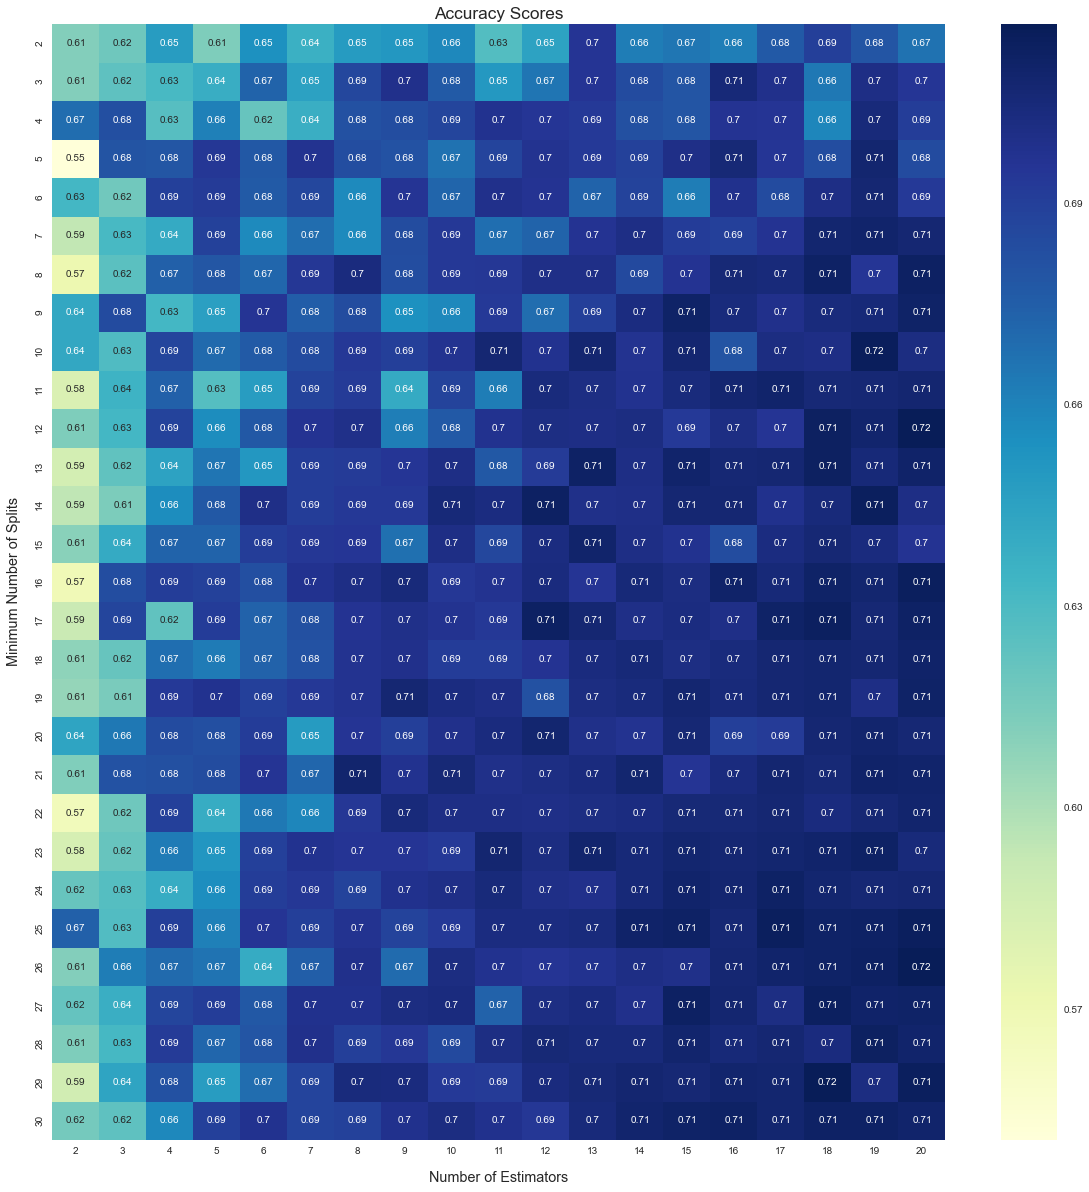

In [44]:
import seaborn as sns
import pylab as P
import matplotlib.pyplot as plt

df_accuracy = df_accuracy[df_accuracy.columns].astype(float)

fig, ax = plt.subplots(figsize=(20,20))

#RdBu_r
ax = sns.heatmap(df_accuracy, cmap="YlGnBu",xticklabels=True,\
                 yticklabels=True,annot=True, ax=ax)
ax.set_title("Accuracy Scores", size='xx-large')
ax.set_xlabel('Number of Estimators', size='x-large', labelpad=15)
ax.set_ylabel('Minimum Number of Splits', size='x-large',labelpad=15)



In [ ]:
print df_precision.head()

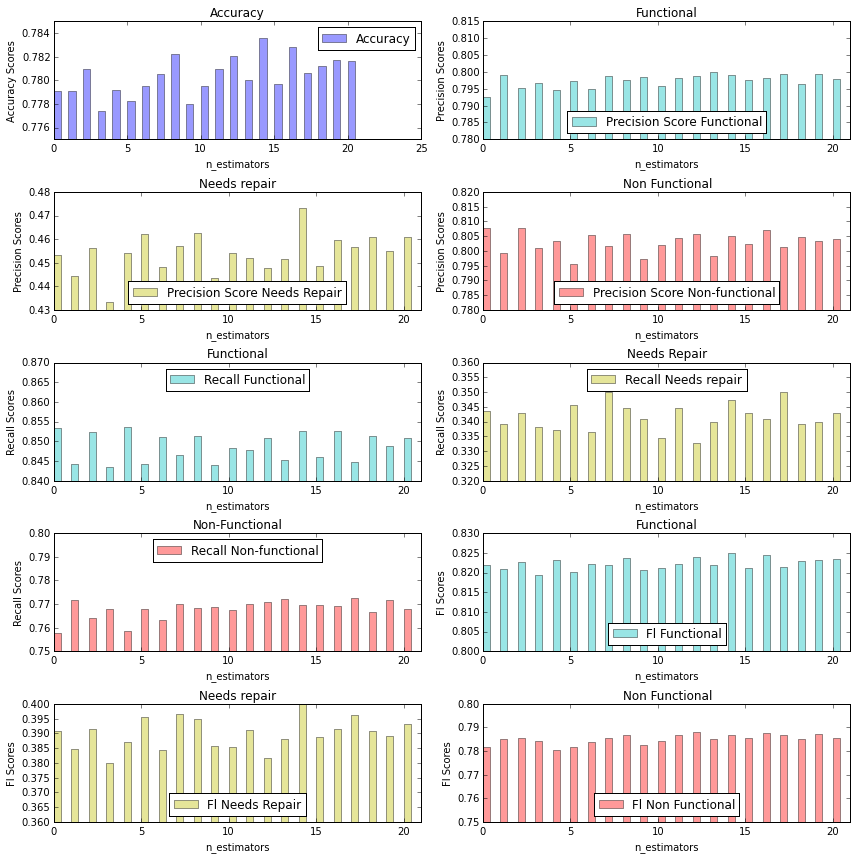

In [147]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2,figsize=(12,12))

n_groups = 21
bar_width = 0.50
index = np.arange(n_groups)
opacity = 0.4

rects1 = ax1.bar(index, acc_score, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Accuracy')

ax1.set_ylim([0.775,0.785])
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Accuracy Scores')

ax1.set_title('Accuracy')
ax1.legend()


bar_width = 0.40
index = np.arange(n_groups)
opacity = 0.4

x1 = []
x2 = []
x3 = []

for element in range(len(prec_score)):
    x1.append(prec_score[element][0])
    x2.append(prec_score[element][1])
    x3.append(prec_score[element][2])

rects1 = ax2.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Precision Score Functional')

rects2 = ax3.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Precision Score Needs Repair')

rects3 = ax4.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Precision Score Non-functional')

ax2.legend(loc=8)
ax2.set_ylim([0.78,0.815])
ax2.set_xlim([0,21])
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('Precision Scores')
ax2.set_title('Functional')

ax3.legend(loc=8)
ax3.set_ylim([0.43,0.48])
ax3.set_xlim([0,21])
ax3.set_xlabel('n_estimators')
ax3.set_ylabel('Precision Scores')
ax3.set_title('Needs repair')

ax4.legend(loc=8)
ax4.set_ylim([0.78,0.82])
ax4.set_xlim([0,21])
ax4.set_xlabel('n_estimators')
ax4.set_ylabel('Precision Scores')
ax4.set_title('Non Functional')


bar_width = 0.40
index = np.arange(n_groups)
opacity = 0.4

x1 = []
x2 = []
x3 = []

for element in range(len(reca_score)):
    x1.append(reca_score[element][0])
    x2.append(reca_score[element][1])
    x3.append(reca_score[element][2])

rects1 = ax5.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Recall Functional')

rects2 = ax6.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Recall Needs repair')

rects3 = ax7.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Recall Non-functional')

ax5.legend(loc=9)
ax5.set_ylim([0.84,0.87])
ax5.set_xlim([0,21])
ax5.set_xlabel('n_estimators')
ax5.set_ylabel('Recall Scores')
ax5.set_title('Functional')

ax6.legend(loc=9)
ax6.set_ylim([0.32,0.36])
ax6.set_xlim([0,21])
ax6.set_xlabel('n_estimators')
ax6.set_ylabel('Recall Scores')
ax6.set_title('Needs Repair')

ax7.legend(loc=9)
ax7.set_ylim([0.75,0.80])
ax7.set_xlim([0,21])
ax7.set_xlabel('n_estimators')
ax7.set_ylabel('Recall Scores')
ax7.set_title('Non-Functional')

x1 = []
x2 = []
x3 = []

for element in range(len(fll_score)):
    x1.append(fll_score[element][0])
    x2.append(fll_score[element][1])
    x3.append(fll_score[element][2])

rects1 = ax8.bar(index, x1, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Fl Functional')

rects2 = ax9.bar(index, x2, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Fl Needs Repair')

rects3 = ax10.bar(index, x3, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Fl Non Functional')

ax8.legend(loc=8)
ax8.set_ylim([0.8,0.83])
ax8.set_xlim([0,21])
ax8.set_xlabel('n_estimators')
ax8.set_ylabel('Fl Scores')
ax8.set_title('Functional')

ax9.legend(loc=8)
ax9.set_ylim([0.36,0.40])
ax9.set_xlim([0,21])
ax9.set_xlabel('n_estimators')
ax9.set_ylabel('Fl Scores')
ax9.set_title('Needs repair')

ax10.legend(loc=8)
ax10.set_ylim([0.75,0.80])
ax10.set_xlim([0,21])
ax10.set_xlabel('n_estimators')
ax10.set_ylabel('Fl Scores')
ax10.set_title('Non Functional')


plt.tight_layout()
plt.show()




In [45]:
import numpy as np

'''
n_estimators increase start with 20, default is 10

'''
num_estimators = [10,11,12,13,14,15,16,17,18,19,20]
train_res = []
test_res
for estim in num_estimators:
    clf = ExtraTreesClassifier(num_estimators=estim)
    X_new_t = clf.fit_transform(X, y)
    result_train = clf.score(X,y)
    result_test = clf.score(X_pumps_test,y_pumps_test)
    print "Number of Estimators: ",estim
    print "Train Score:",result_train
    print "Test Score:",result_test
    

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]],X.columns.values[indices[f]]))

print "X_new_t",len(X_new_t)

print X_new_t.shape


(44550, 14)
Train Score: 0.995061728395
Test Score: 0.779057239057
Feature ranking:
1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh
15. feature 25 (0.010126) VWC
16. feature 31 (0.009989) True
17. feature 30 (0.009214) False
18. feature 17 (0.008781) True
19. feature 69 (0.008713) unknown
20. feature 63 (0.007745) unknown
21. feature 86 (0.007675) communal standpipe
22. feature 66 (0.007240) good
23. feature 56 (0.007170) user-group
24. feature 16 (0.007167) False
25. feature 62 (0.007049) per bucket
26. feature 11 (0.006857) Lake Victoria
27. feature 73 (0.006853

//anaconda/lib/python2.7/site-packages/sklearn/base.py:436: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.fit(X, y, **fit_params).transform(X)


In [46]:
import matplotlib.pyplot as plt

In [280]:
'''from sklearn.tree import DecisionTreeClassifier
clf2222 = DecisionTreeClassifier()
X_new = clf2222.fit_transform(X, y)
result_train = clf2222.score(X,y)
print result_test

with open("export2.dot","wb") as f:
    f = export_graphviz(clf2222,out_file=f,feature_names=indices)
'''

0.778181818182


In [287]:
'''from sklearn import tree
import StringIO
import pydot
from sklearn.externals.six import StringIO  

clf2222 = DecisionTreeClassifier()
N = clf2222.fit_transform(X,y)

X_333 = X[['latitude','longitude','gps_height','dry','population']]
clf333 = DecisionTreeClassifier()
transform = clf333.fit_transform(X_333,y)

dot_data = StringIO()
tree.export_graphviz(clf333, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("DTF.pdf")'''

True

In [264]:
'''
with open("export1.dot","wb") as f:
    f = export_graphviz(clf,out_file=f,feature_names=indices)
'''    

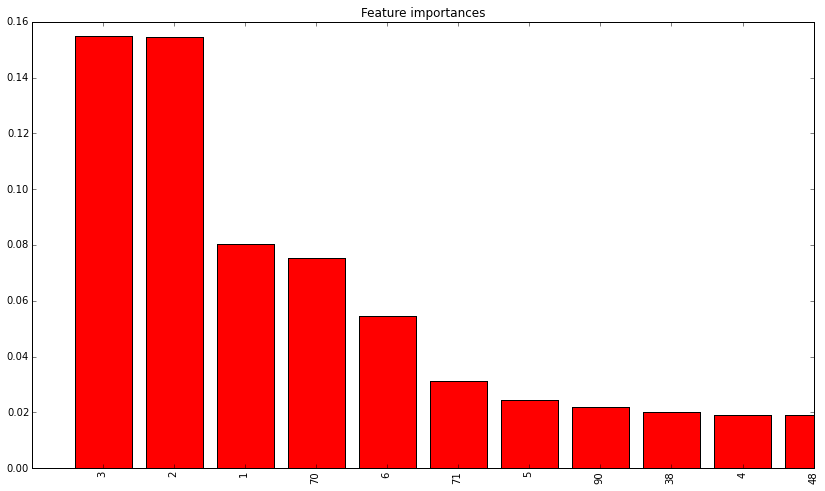

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'region_code'
 'district_code' 'population' 'Internal' 'Lake Nyasa' 'Lake Rukwa'
 'Lake Tanganyika' 'Lake Victoria' 'Pangani' 'Rufiji'
 'Ruvuma / Southern Coast' 'Wami / Ruvu' 'False' 'True' 'Company' 'None'
 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust' 'VWC' 'WUA' 'WUG'
 'Water Board' 'Water authority' False True 'afridev' 'gravity'
 'india mark ii' 'india mark iii' 'mono' 'nira/tanira' 'other'
 'other handpump' 'other motorpump' 'rope pump' 'submersible' 'swn 80'
 'wind-powered' 'gravity' 'handpump' 'motorpump' 'other' 'rope pump'
 'submersible' 'wind-powered' 'commercial' 'other' 'parastatal' 'unknown'
 'user-group' 'annually' 'monthly' 'never pay' 'on failure' 'other'
 'per bucket' 'unknown' 'colored' 'fluoride' 'good' 'milky' 'salty'
 'unknown' 'dry' 'enough' 'insufficient' 'seasonal' 'unknown' 'borehole'
 'dam' 'other' 'rainwater harvesting' 'river/lake' 'shallow well' 'spring'
 'groundwater' 'surface' 'unknown' 'cattle t

In [47]:
# Plot the feature importances of the forest

plt.figure(figsize=(14,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), indices, rotation='vertical')
plt.xlim([-1, 10])
plt.show()

print X.columns.values
for a in range(len(X.columns.values)):
    print a," - ", X.columns.values[indices[a]]





In [224]:
'''X_2 = X[['latitude','longitude','gps_height','dry','population']]

print X_2.head()'''

        latitude  longitude  gps_height  dry  population
37900  -4.053327  33.104711           0    0           0
40527  -8.954532  32.569985           0    0           0
26058  -8.439998  31.736616        1804    0         200
6969   -9.123071  34.774402        1821    0         108
41018 -10.923966  36.092962         767    0         400


In [54]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv', index_col='id')
print test.head()

test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
            'population','basin','public_meeting','scheme_management','permit',\
            'extraction_type_group','extraction_type_class','management_group',\
            'payment_type','quality_group','quantity_group',\
            'source_type','source_class','waterpoint_type_group']]

print test.head()

       amount_tsh date_recorded                  funder  gps_height  \
id                                                                    
50785           0    2013-02-04                    Dmdd        1996   
51630           0    2013-02-04  Government Of Tanzania        1569   
17168           0    2013-02-01                     NaN        1567   
45559           0    2013-01-22              Finn Water         267   
49871         500    2013-03-27                  Bruder        1260   

        installer  longitude   latitude                 wpt_name  num_private  \
id                                                                              
50785        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
51630         DWE  36.656709  -3.309214                  Kimnyak            0   
17168         NaN  34.767863  -5.004344           Puma Secondary            0   
45559  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
49871      BRUDE

KeyError: "['id'] not in index"

In [55]:
tf_data_basin = pd.get_dummies(test['basin'])
print 'basin:',tf_data_basin.shape
tf_data_public_meeting = pd.get_dummies(test['public_meeting'])
print 'Public Meeting:',tf_data_public_meeting.shape
tf_data_scheme_mgmnt = pd.get_dummies(test['scheme_management'])
print 'Scheme Management:',tf_data_scheme_mgmnt.shape
tf_data_permit = pd.get_dummies(test['permit'])
print 'permit:',tf_data_permit.shape
tf_data_extraction_type_group = pd.get_dummies(test['extraction_type_group'])
print 'Data Extraction:',tf_data_extraction_type_group.shape
tf_data_extraction_type_class = pd.get_dummies(test['extraction_type_class'])
print 'Data Extr Type:',tf_data_extraction_type_class.shape
tf_data_management_group = pd.get_dummies(test['management_group'])
print 'Management Group:',tf_data_management_group.shape
tf_data_payment_type = pd.get_dummies(test['payment_type'])
print 'Payment Type:',tf_data_payment_type.shape
tf_data_quality_group = pd.get_dummies(test['quality_group'])
print 'Quality Group:',tf_data_quality_group.shape
tf_data_quantity_group = pd.get_dummies(test['quantity_group'])
print 'Quantity Group:',tf_data_quantity_group.shape
tf_data_source_type = pd.get_dummies(test['source_type'])
print 'Source Type:',tf_data_source_type.shape
tf_data_source_class = pd.get_dummies(test['source_class'])
print 'Source Class:',tf_data_source_class.shape
tf_data_waterpoint_type_group = pd.get_dummies(test['waterpoint_type_group'])
print 'Waterpoint Type:',tf_data_waterpoint_type_group.shape

basin: (14850, 9)
Public Meeting: (14850, 2)
Scheme Management: (14850, 11)
permit: (14850, 2)
Data Extraction: (14850, 13)
Data Extr Type: (14850, 7)
Management Group: (14850, 5)
Payment Type: (14850, 7)
Quality Group: (14850, 6)
Quantity Group: (14850, 5)
Source Type: (14850, 7)
Source Class: (14850, 3)
Waterpoint Type: (14850, 6)


In [56]:
tf_data = test[['amount_tsh','gps_height','longitude','latitude','region_code','district_code','population']]

tf_coded = pd.concat([tf_data,tf_data_basin,tf_data_public_meeting,tf_data_scheme_mgmnt,tf_data_permit,\
                      tf_data_extraction_type_group,tf_data_extraction_type_class,tf_data_management_group,\
                      tf_data_payment_type,tf_data_quality_group,tf_data_quantity_group,\
                      tf_data_source_type,tf_data_source_class,tf_data_waterpoint_type_group],axis=1)

print tf_data.shape
print tf_coded.shape
print type(tf_coded)

(14850, 7)
(14850, 90)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

In [58]:
print tf_coded.tail()
print test.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
id                                                                 
39307           0          34  38.852669  -6.582841            6   
18990        1000           0  37.451633  -5.350428            4   
28749           0        1476  34.739804  -4.585587           13   
33492           0         998  35.432732 -10.584159           10   
68707           0         481  34.765054 -11.226012           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
id                                                                  ...     
39307              1          20         0           0           0  ...     
18990              7        2960         0           0           0  ...     
28749              2         200         1           0           0  ...     
33492              2         150         0           1           0  ...     
68707              3          40         0           1       

In [59]:
'''1. feature 3 (0.154770) latitude
2. feature 2 (0.154396) longitude
3. feature 1 (0.080339) gps_height
4. feature 70 (0.075335) dry
5. feature 6 (0.054576) population
6. feature 71 (0.031172) enough
7. feature 5 (0.024468) district_code
8. feature 90 (0.021932) other
9. feature 38 (0.020333) other
10. feature 4 (0.019230) region_code
11. feature 48 (0.018980) other
12. feature 59 (0.017779) never pay
13. feature 72 (0.016599) insufficient
14. feature 0 (0.015377) amount_tsh'''

tf_coded_2 = tf_coded[['latitude','longitude','gps_height','dry','population','enough','district_code',\
                       'region_code','never pay','insufficient']]

print tf_coded_2.head()
print tf_coded_2.tail()


        latitude  longitude  gps_height  dry  population  enough  \
id                                                                 
50785  -4.059696  35.290799        1996    0         321       0   
51630  -3.309214  36.656709        1569    0         300       0   
17168  -5.004344  34.767863        1567    0         500       0   
45559  -9.418672  38.058046         267    1         250       0   
49871 -10.950412  35.006123        1260    0          60       1   

       district_code  region_code  never pay  insufficient  
id                                                          
50785              3           21          1             0  
51630              2            2          1             1  
17168              2           13          1             1  
45559             43           80          0             0  
49871              3           10          0             0  
        latitude  longitude  gps_height  dry  population  enough  \
id                          

In [70]:
X_transformed = X_pumps_train[['latitude','longitude','gps_height','dry','population','enough','district_code',\
                       'region_code','never pay','insufficient']]

y = y_pumps_train[['label']]

clf_transformed = ExtraTreesClassifier()
X_fit_n = clf_transformed.fit(X_transformed, y)
result_transformed = clf_transformed.score(X_transformed,y)

print tf_coded_2.head()
print tf_coded_2.tail()
a = clf_transformed.predict(tf_coded_2)

print a


        latitude  longitude  gps_height  dry  population  enough  \
id                                                                 
50785  -4.059696  35.290799        1996    0         321       0   
51630  -3.309214  36.656709        1569    0         300       0   
17168  -5.004344  34.767863        1567    0         500       0   
45559  -9.418672  38.058046         267    1         250       0   
49871 -10.950412  35.006123        1260    0          60       1   

       district_code  region_code  never pay  insufficient  
id                                                          
50785              3           21          1             0  
51630              2            2          1             1  
17168              2           13          1             1  
45559             43           80          0             0  
49871              3           10          0             0  
        latitude  longitude  gps_height  dry  population  enough  \
id                          

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [71]:
print a

['functional' 'functional' 'functional' ..., 'functional' 'functional'
 'non functional']


In [74]:
pred = a

to_submit = []
print len(tf_coded_2)
for ind in range(len(tf_coded_2)):
    ids = tf_coded_2.index[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_7.csv', sep=',', index=False)


14850
      id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
          id    status_group
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional


In [75]:
print df_submit['status_group'].unique()

['functional' 'non functional' 'functional needs repair']
